In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, auc, roc_curve
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [26]:
#import sys
#!{sys.executable} -m pip install xgboost

In [27]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive

In [28]:
df_train = pd.read_csv('Kaggle_Training_Dataset_v2.csv')
df_test = pd.read_csv('Kaggle_Test_Dataset_v2.csv')

C:\Users\manee\AppData\Local\Temp\ipykernel_26196\2017624301.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('Kaggle_Training_Dataset_v2.csv')
C:\Users\manee\AppData\Local\Temp\ipykernel_26196\2017624301.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('Kaggle_Test_Dataset_v2.csv')


In [29]:
df_train

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [30]:
df_test

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [31]:
# Shape of train and test datsets
print(df_train.shape)
print(df_test.shape)

(1687861, 23)
(242076, 23)


In [32]:
# Last row in both the datasets in Nan, so dropping them
df_train = df_train.drop(df_train.tail(1).index)
df_test = df_test.drop(df_test.tail(1).index)        

In [33]:
# Merging train and test datasets into a single dataset
df = df_train.append(df_test, ignore_index = True)

C:\Users\manee\AppData\Local\Temp\ipykernel_26196\3035109296.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test, ignore_index = True)


In [34]:
# Shape of the dataset
df.shape

(1929935, 23)

In [35]:
# Checking for unique SKUs 
len(df.sku.unique())

1929935

No. of unique SKUs is equal to number of rows. So, we can drop 'sku' feature because it will not add any value during modeling

In [36]:
# Dropping SKU column
df = df.drop('sku', axis = 1)

In [37]:
# Descriptive statistics
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


1. With the exception of lead_time, perf_6_month_avg, and perf_12_month_avg, the mean values of the numerical features exceed the 50th or 75th percentile, indicating that they are skewed to the right. On the other hand, lead_time is skewed to the left.
2. The minimum and maximum values of 'perf_6_month_avg' and 'perf_12_month_avg' are -99 and 1, respectively. This could suggest that the missing values in both columns were substituted with -99.
3. There is a substantial difference between the 75th percentile value and the maximum value for each feature, implying the existence of outliers.

In [38]:
# Checking for missing values
df.isna().sum()

national_inv              0
lead_time            115617
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

In [39]:
# Checking for percentage missing values
df.isna().mean()

national_inv         0.000000
lead_time            0.059907
in_transit_qty       0.000000
forecast_3_month     0.000000
forecast_6_month     0.000000
forecast_9_month     0.000000
sales_1_month        0.000000
sales_3_month        0.000000
sales_6_month        0.000000
sales_9_month        0.000000
min_bank             0.000000
potential_issue      0.000000
pieces_past_due      0.000000
perf_6_month_avg     0.000000
perf_12_month_avg    0.000000
local_bo_qty         0.000000
deck_risk            0.000000
oe_constraint        0.000000
ppap_risk            0.000000
stop_auto_buy        0.000000
rev_stop             0.000000
went_on_backorder    0.000000
dtype: float64

There are missing values only in 'lead_time' feature and only accounts for ~5% of the data. We can impute them.

In [40]:
# Target feature class ratio 
df['went_on_backorder'].value_counts()/len(df.went_on_backorder)

No     0.992756
Yes    0.007244
Name: went_on_backorder, dtype: float64

In [41]:
df['went_on_backorder'].value_counts()

No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64

1. 99.27% of data points belong to class 'No' and 0.72% belong to class 'Yes'
2. Class ratio of majority class to minority class is 137:1
3. We have an imbalanced dataset, and resampling techniques (oversampling or undersampling) should be used to address this issue

C:\Users\manee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='went_on_backorder', ylabel='count'>

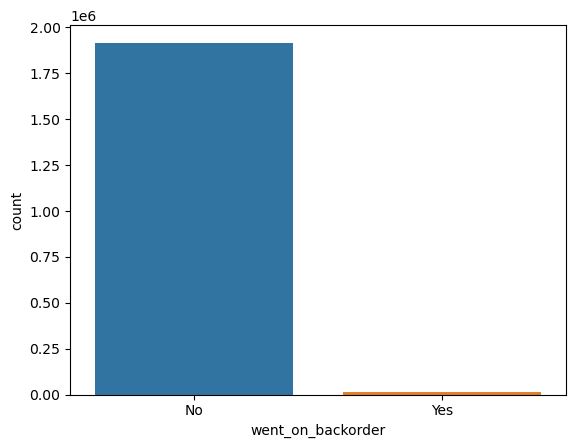

In [42]:
sns.countplot(df['went_on_backorder'])

In [43]:
df.dtypes

national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [44]:
numerical_columns = []
numerical_features = df.select_dtypes(include = ['int64', 'float64']).columns
for i in numerical_features:
    if i != 'went_on_backorder':
        numerical_columns.append(i)

In [45]:
len(numerical_columns)

15

Text(0.5, 1.0, 'Box plot - national_inv')

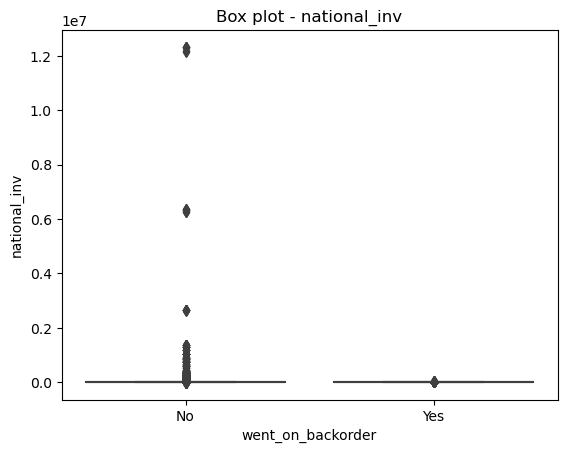

In [48]:
# Box plot for 'national_inv'
sns.boxplot(x = 'went_on_backorder', y = 'national_inv', data = df).set_title('Box plot - national_inv')

Text(0.5, 1.0, 'Box plot - national_inv')

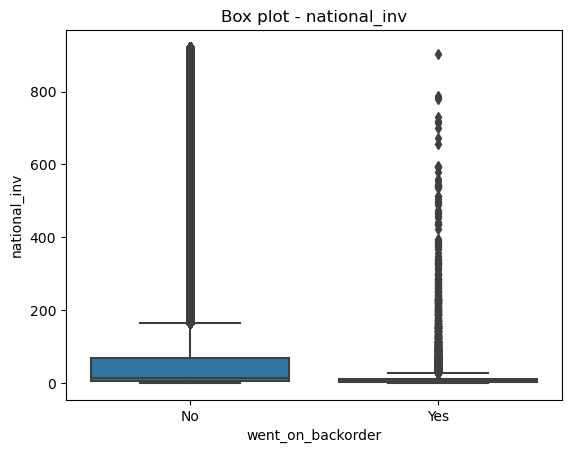

In [18]:
# Box plot for 'national_inv' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'national_inv', data = df[(df.national_inv < df.national_inv.quantile(0.95))  & (df.national_inv > df.national_inv.quantile(0.05))]).set_title('Box plot - national_inv')

1. Second box plot with data between 5th and 95th percentile has been plotted because it is very tough to infer from the first box plot
2. The number of outliers is very high

Text(0.5, 1.0, 'Box plot - lead_time')

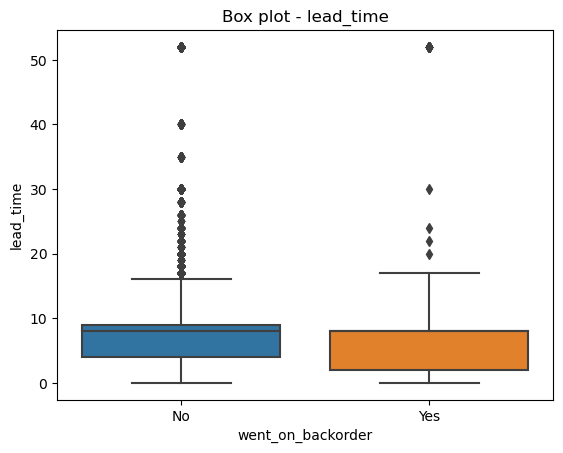

In [41]:
# Box plot for 'lead_time'
sns.boxplot(x = 'went_on_backorder', y = 'lead_time', data = df).set_title('Box plot - lead_time')

The number of outliers in 'lead_time' is low when compared to 'national_inv'

Text(0.5, 1.0, 'Box plot - in_transit_qty')

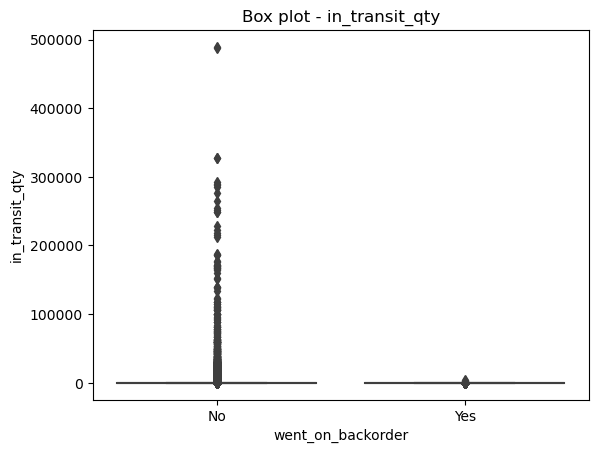

In [42]:
# Box plot for 'in_transit_qty'
sns.boxplot(x = 'went_on_backorder', y = 'in_transit_qty', data = df).set_title('Box plot - in_transit_qty')

Text(0.5, 1.0, 'Box plot - in_transit_qty')

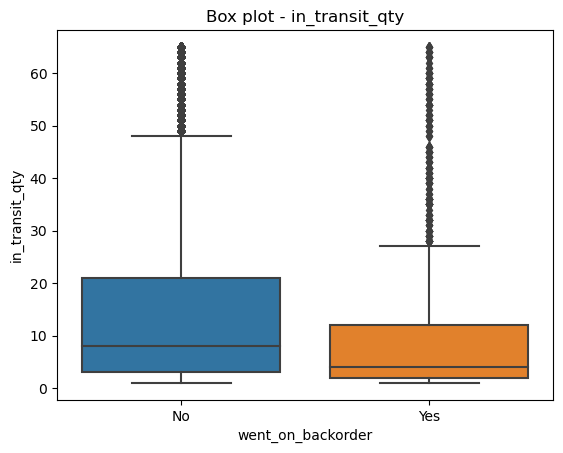

In [19]:
# Box plot for 'in_transit_qty' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'in_transit_qty', data = df[(df.in_transit_qty < df.in_transit_qty.quantile(0.95))  & (df.in_transit_qty > df.in_transit_qty.quantile(0.05))]).set_title('Box plot - in_transit_qty')

Text(0.5, 1.0, 'Box plot - forecast_3_month')

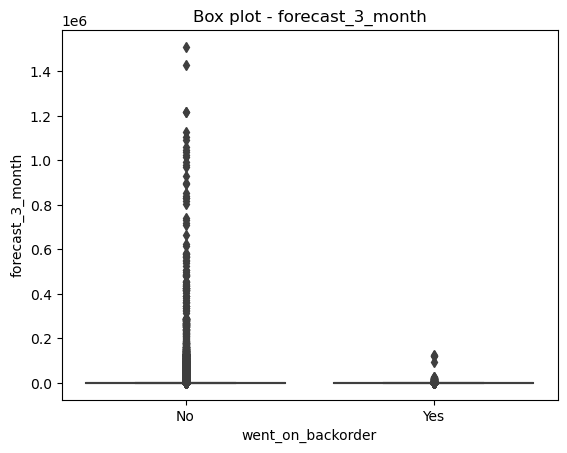

In [44]:
# Box plot for 'forecast_3_month'
sns.boxplot(x = 'went_on_backorder', y = 'forecast_3_month', data = df).set_title('Box plot - forecast_3_month')

Text(0.5, 1.0, 'Box plot - forecast_3_month')

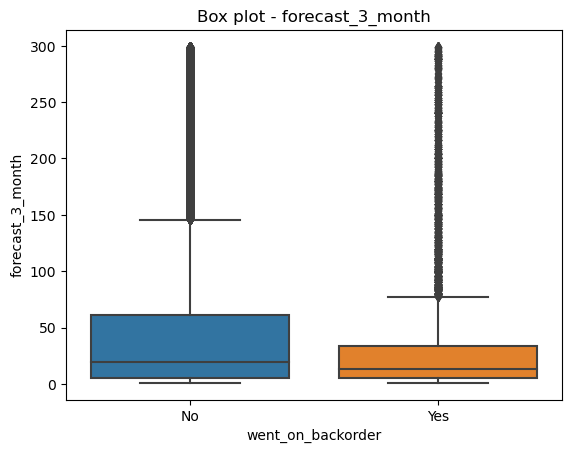

In [20]:
# Box plot for 'forecast_3_month' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'forecast_3_month', data = df[(df.forecast_3_month < df.forecast_3_month.quantile(0.95))  & (df.forecast_3_month > df.forecast_3_month.quantile(0.05))]).set_title('Box plot - forecast_3_month')

Text(0.5, 1.0, 'Box plot - forecast_6_month')

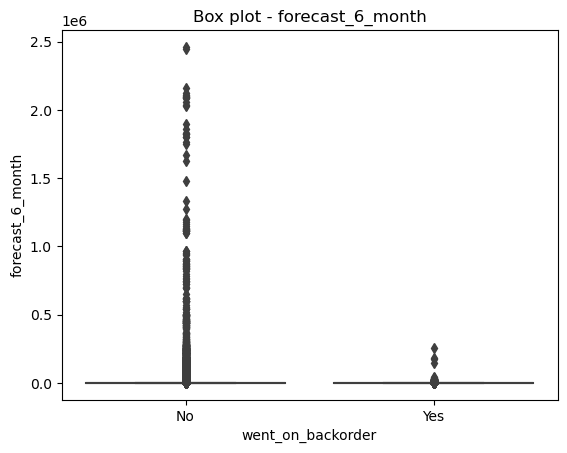

In [46]:
# Box plot for 'forecast_6_month'
sns.boxplot(x = 'went_on_backorder', y = 'forecast_6_month', data = df).set_title('Box plot - forecast_6_month')

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_6_month'>

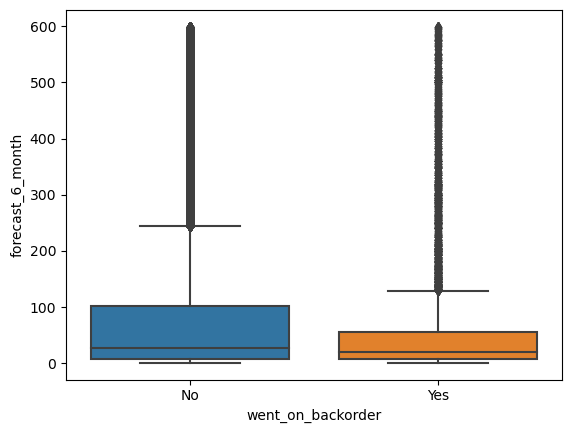

In [47]:
# Box plot for 'forecast_6_month' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'forecast_6_month', data = df[(df.forecast_6_month < df.forecast_6_month.quantile(0.95))  & (df.forecast_6_month > df.forecast_6_month.quantile(0.05))])

Text(0.5, 1.0, 'Box plot - forecast_9_month')

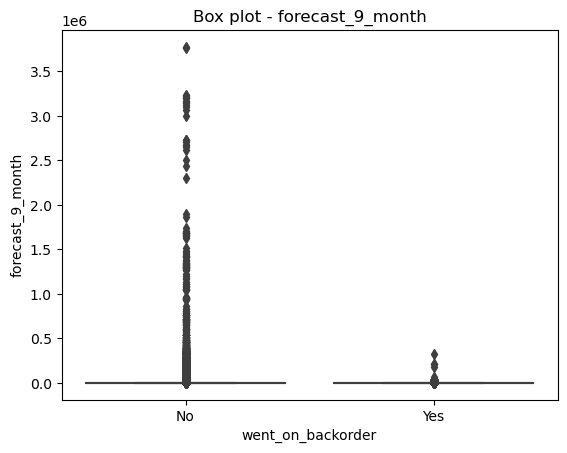

In [48]:
# Box plot for 'forecast_9_month'
sns.boxplot(x = 'went_on_backorder', y = 'forecast_9_month', data = df).set_title('Box plot - forecast_9_month')

<AxesSubplot:xlabel='went_on_backorder', ylabel='forecast_9_month'>

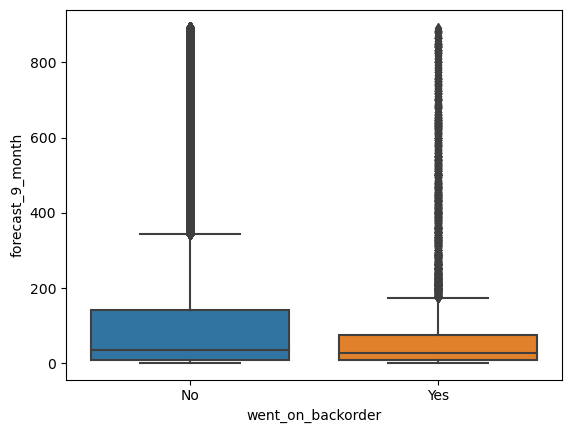

In [49]:
# Box plot for 'forecast_9_month' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'forecast_9_month', data = df[(df.forecast_9_month < df.forecast_9_month.quantile(0.95))  & (df.forecast_9_month > df.forecast_9_month.quantile(0.05))])

Text(0.5, 1.0, 'Box plot - sales_1_month')

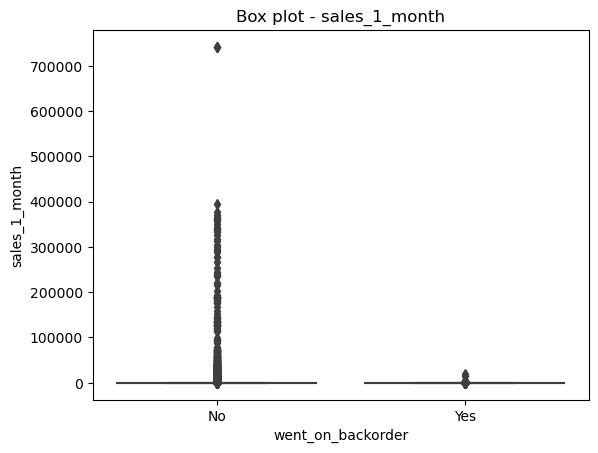

In [50]:
# Box plot for 'sales_1_month'
sns.boxplot(x = 'went_on_backorder', y = 'sales_1_month', data = df).set_title('Box plot - sales_1_month')

Text(0.5, 1.0, 'Box plot - sales_1_month')

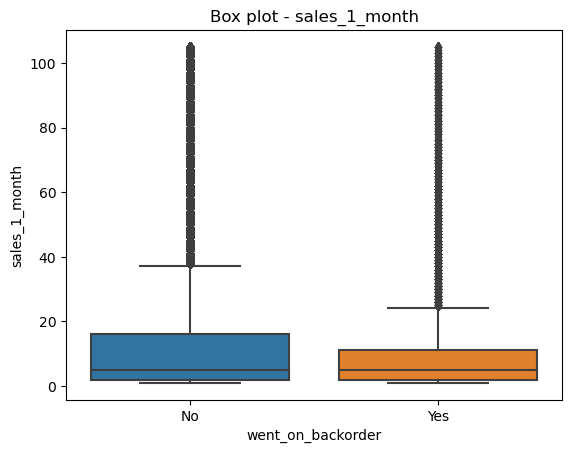

In [21]:
# Box plot for 'sales_1_month' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'sales_1_month', data = df[(df.sales_1_month < df.sales_1_month.quantile(0.95))  & (df.sales_1_month > df.sales_1_month.quantile(0.05))]).set_title('Box plot - sales_1_month')

Text(0.5, 1.0, 'Box plot - sales_3_month')

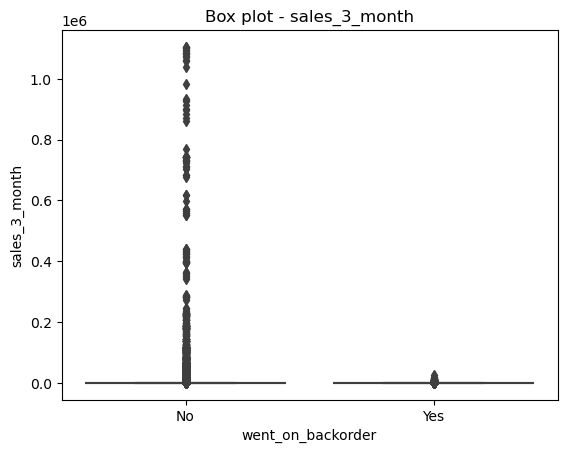

In [52]:
# Box plot for 'sales_3_month'
sns.boxplot(x = 'went_on_backorder', y = 'sales_3_month', data = df).set_title('Box plot - sales_3_month')

Text(0.5, 1.0, 'Box plot - sales_3_month')

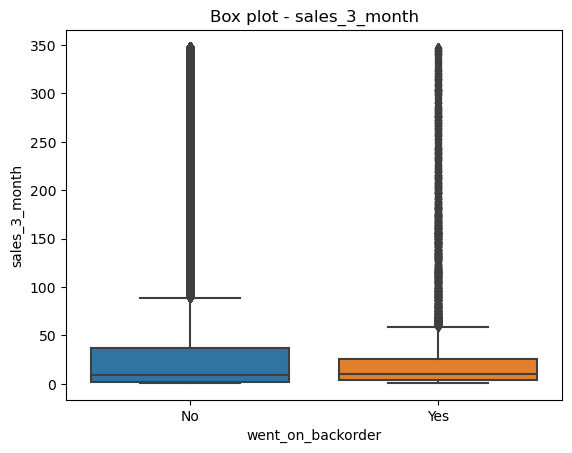

In [23]:
# Box plot for 'sales_3_month' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'sales_3_month', data = df[(df.sales_3_month < df.sales_3_month.quantile(0.95))  & (df.sales_3_month > df.sales_3_month.quantile(0.05))]).set_title('Box plot - sales_3_month')

Text(0.5, 1.0, 'Box plot - sales_6_month')

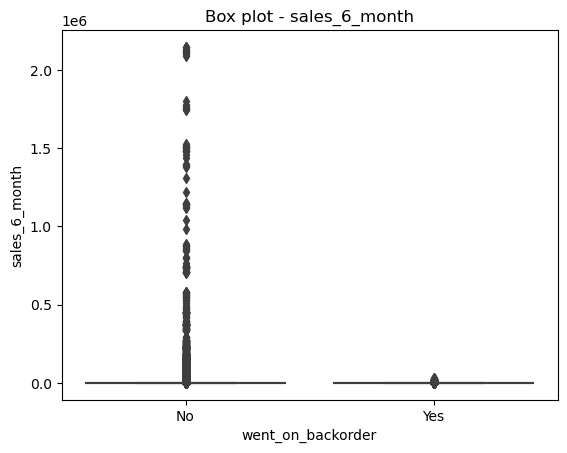

In [54]:
# Box plot for 'sales_6_month'
sns.boxplot(x = 'went_on_backorder', y = 'sales_6_month', data = df).set_title('Box plot - sales_6_month')

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_6_month'>

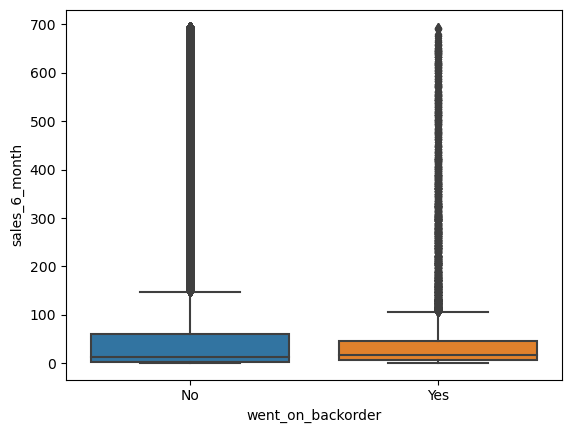

In [55]:
# Box plot for 'sales_6_month' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'sales_6_month', data = df[(df.sales_6_month < df.sales_6_month.quantile(0.95))  & (df.sales_6_month > df.sales_6_month.quantile(0.05))])

Text(0.5, 1.0, 'Box plot - sales_9_month')

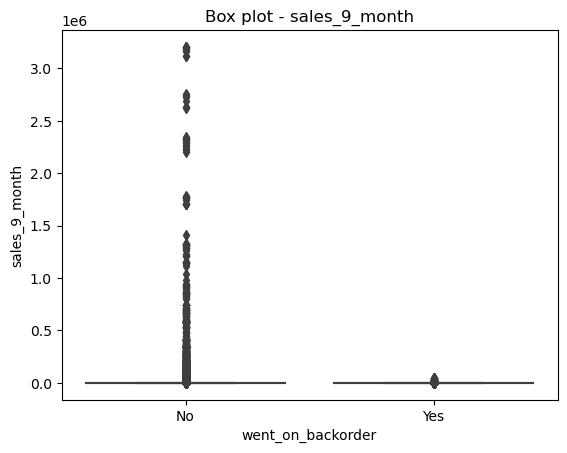

In [56]:
# Box plot for 'sales_9_month'
sns.boxplot(x = 'went_on_backorder', y = 'sales_9_month', data = df).set_title('Box plot - sales_9_month')

<AxesSubplot:xlabel='went_on_backorder', ylabel='sales_9_month'>

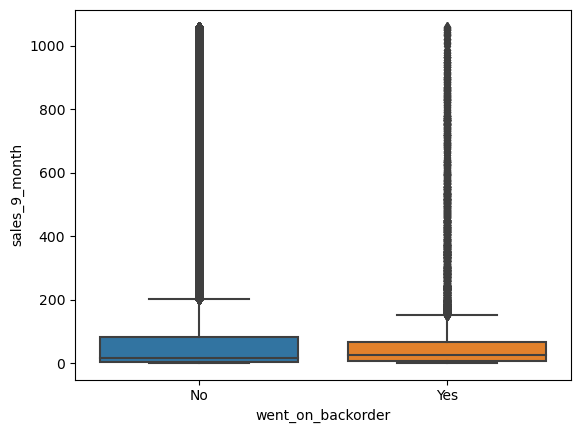

In [57]:
# Box plot for 'sales_9_month' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'sales_9_month', data = df[(df.sales_9_month < df.sales_9_month.quantile(0.95))  & (df.sales_9_month > df.sales_9_month.quantile(0.05))])

Text(0.5, 1.0, 'Box plot - min_bank')

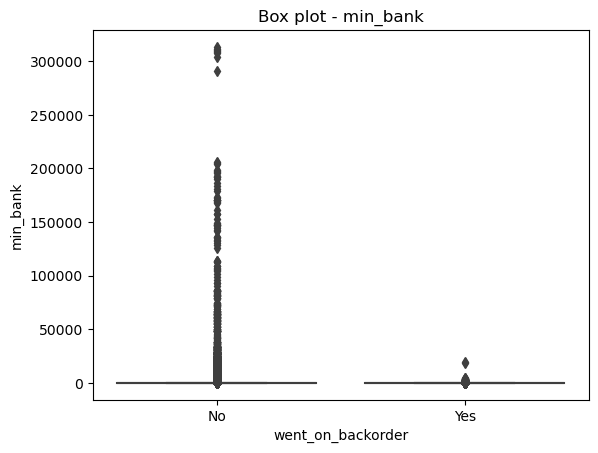

In [58]:
# Box plot for 'min_bank'
sns.boxplot(x = 'went_on_backorder', y = 'min_bank', data = df).set_title('Box plot - min_bank')

Text(0.5, 1.0, 'Box plot - min_bank')

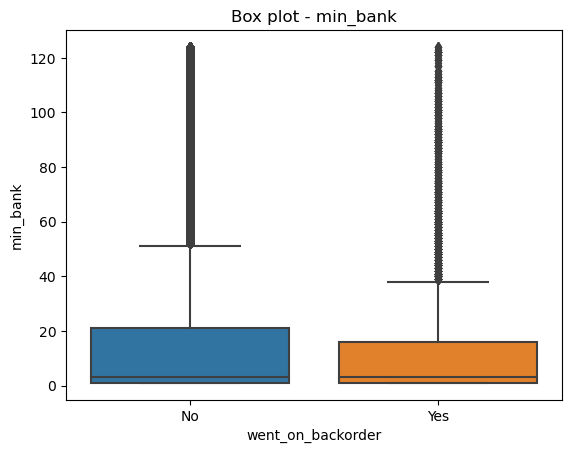

In [22]:
# Box plot for 'min_bank' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'min_bank', data = df[(df.min_bank < df.min_bank.quantile(0.95))  & (df.min_bank > df.min_bank.quantile(0.05))]).set_title('Box plot - min_bank')

Text(0.5, 1.0, 'Box plot - perf_6_month_avg')

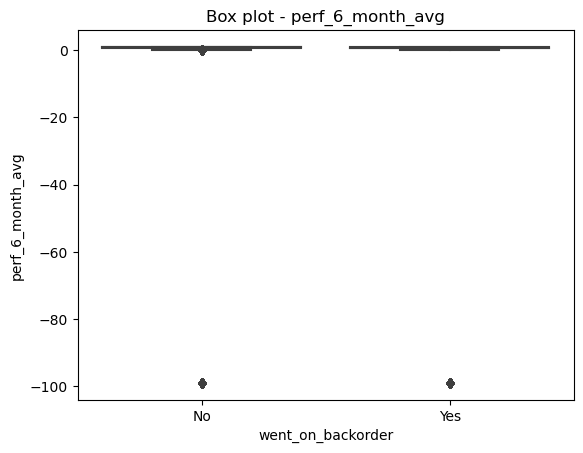

In [60]:
# Box plot for 'perf_6_month_avg'
sns.boxplot(x = 'went_on_backorder', y = 'perf_6_month_avg', data = df).set_title('Box plot - perf_6_month_avg')

Text(0.5, 1.0, 'Box plot - perf_6_month_avg')

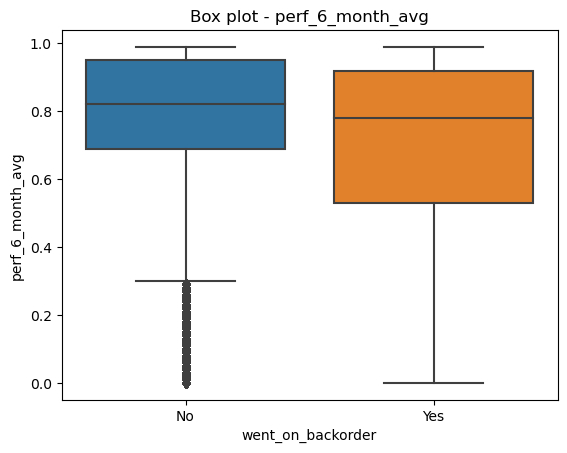

In [25]:
# Box plot for 'perf_6_month_avg' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'perf_6_month_avg', data = df[(df.perf_6_month_avg < df.perf_6_month_avg.quantile(0.95))  & (df.perf_6_month_avg > df.perf_6_month_avg.quantile(0.05))]).set_title('Box plot - perf_6_month_avg')

Text(0.5, 1.0, 'Box plot - perf_12_month_avg')

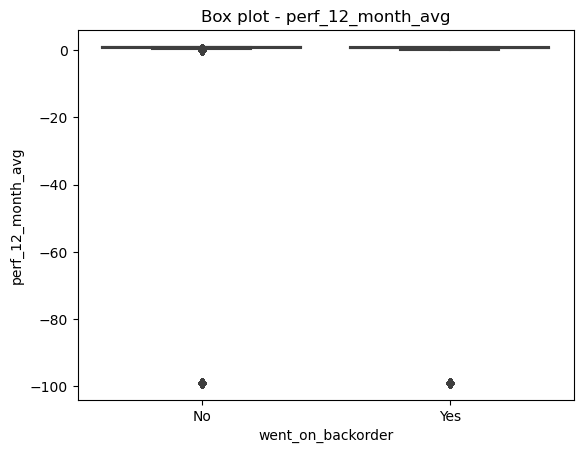

In [62]:
# Box plot for 'perf_12_month_avg'
sns.boxplot(x = 'went_on_backorder', y = 'perf_12_month_avg', data = df).set_title('Box plot - perf_12_month_avg')

Text(0.5, 1.0, 'Box plot - perf_12_month_avg')

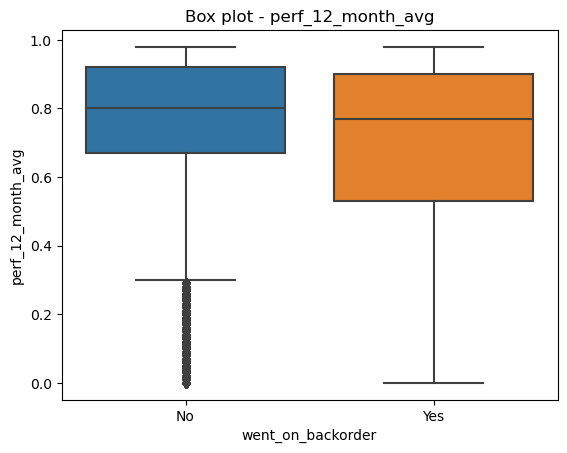

In [26]:
# Box plot for 'perf_12_month_avg' from 5th to 95th percentile
sns.boxplot(x = 'went_on_backorder', y = 'perf_12_month_avg', data = df[(df.perf_12_month_avg < df.perf_12_month_avg.quantile(0.95))  & (df.perf_12_month_avg > df.perf_12_month_avg.quantile(0.05))]).set_title('Box plot - perf_12_month_avg')

Text(0.5, 1.0, 'Bar plot showing ratio of SKUs went into back order based on rev_stop feature')

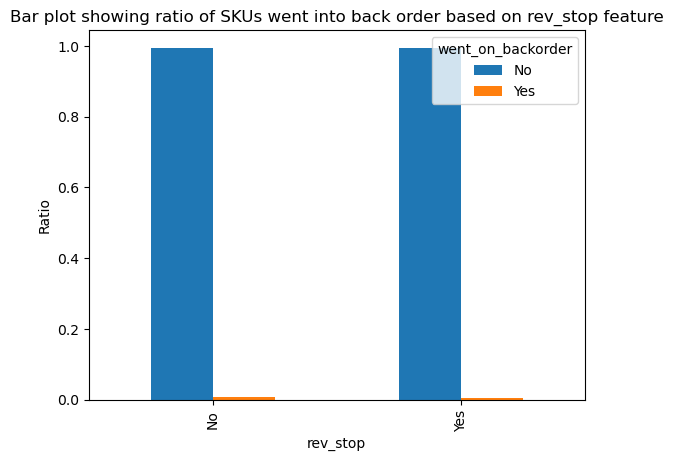

In [64]:
# Bar plot for 'rev_stop'
count = df.groupby(['rev_stop','went_on_backorder']).size().unstack()
ratio = count.T.div(count.T.sum()).T

fig,ax = plt.subplots()
ratio.plot(kind='bar',ax=ax)

ax.set_xlabel('rev_stop')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Ratio')
ax.set_title('Bar plot showing ratio of SKUs went into back order based on rev_stop feature')

1. When rev_stop = No, product did not go to backorder 99.27% of times
2. When rev_stop = Yes, product did not go to backorder 99.52% of times
3. So, the 'rev_stop' flag does not help us in distinguishing whether the product goes to backorder or not as the proportion of classes is equally distributed between both the 'rev_stop' flag values

Text(0.5, 1.0, 'Bar plot showing ratio of items went into back order based on potential_issue feature')

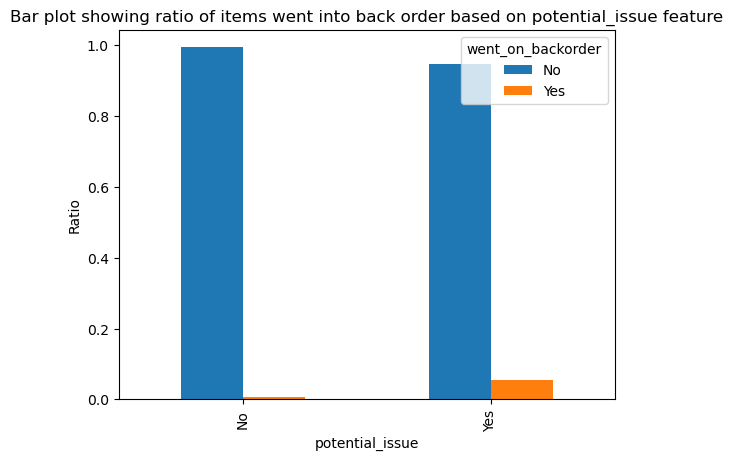

In [65]:
# Bar plot for 'potential_issue'
count = df.groupby(['potential_issue','went_on_backorder']).size().unstack()
ratio = count.T.div(count.T.sum()).T

fig,ax = plt.subplots()
ratio.plot(kind='bar',ax=ax)

ax.set_xlabel('potential_issue')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Ratio')
ax.set_title('Bar plot showing ratio of items went into back order based on potential_issue feature')

1. When there is a potential_issue, product did not go to backorder 99.27% of times
2. When there is a potential_issue, product did not go to backorder 94.53% of times
3. The product going to backorder is 7.5 times higher when there is a potential issue when compared to when there is no potential issue

Text(0.5, 1.0, 'Bar plot showing ratio of items went into back order based on flag deck_risk')

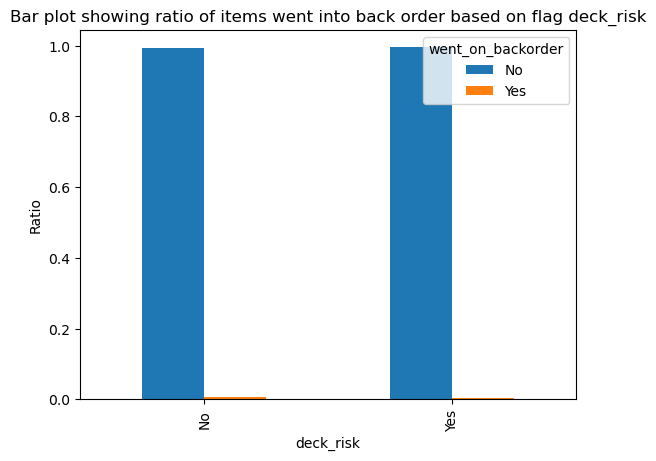

In [66]:
# Bar plot for 'deck_risk'
count = df.groupby(['deck_risk','went_on_backorder']).size().unstack()
ratio = count.T.div(count.T.sum()).T

fig,ax = plt.subplots()
ratio.plot(kind='bar',ax=ax)

ax.set_xlabel('deck_risk')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Ratio')
ax.set_title('Bar plot showing ratio of items went into back order based on flag deck_risk')

1. When deck_risk = No, product did not go to backorder 99.21% of times
2. When deck_risk = Yes, product did not go to backorder 99.47% of times
3. So, the 'deck_risk' flag does not help us in distinguishing whether the product goes to backorder or not as the proportion of classes is equally distributed between both the 'deck_risk' flag values

Text(0.5, 1.0, 'Bar plot showing ratio of items went into back order based on flag oe_constraint')

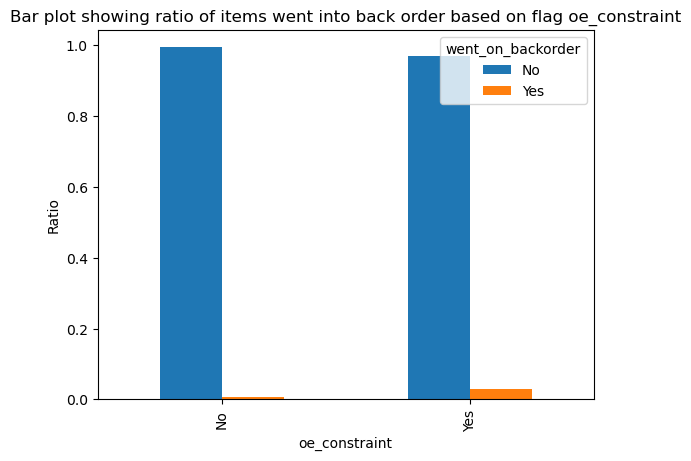

In [67]:
# Bar plot for 'oe_constraint'
count = df.groupby(['oe_constraint','went_on_backorder']).size().unstack()
ratio = count.T.div(count.T.sum()).T

fig,ax = plt.subplots()
ratio.plot(kind='bar',ax=ax)

ax.set_xlabel('oe_constraint')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Ratio')
ax.set_title('Bar plot showing ratio of items went into back order based on flag oe_constraint')

1. When oe_constraint = No, product did not go to backorder 99.27% of times
2. When oe_constraint = Yes, product did not go to backorder 96.91% of times
3. When oe_constraint = Yes, then the product going to backorder is 4 times higher than when oe_constraint = No

Text(0.5, 1.0, 'Bar plot showing ratio of items went into back order based on flag ppap_risk')

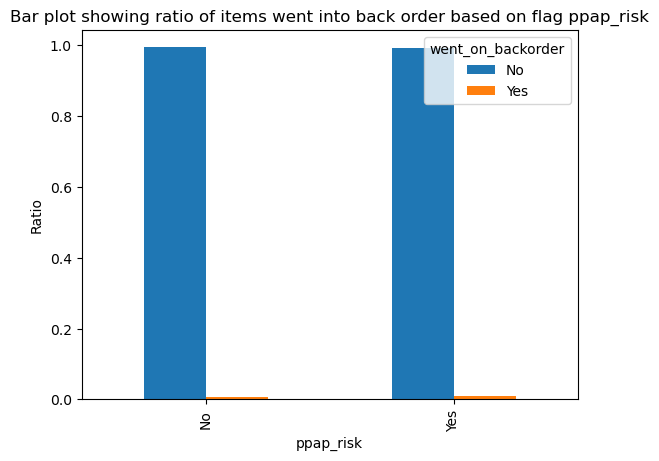

In [68]:
# Bar plot for 'ppap_risk'
count = df.groupby(['ppap_risk','went_on_backorder']).size().unstack()
ratio = count.T.div(count.T.sum()).T

fig,ax = plt.subplots()
ratio.plot(kind='bar',ax=ax)

ax.set_xlabel('ppap_risk')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Ratio')
ax.set_title('Bar plot showing ratio of items went into back order based on flag ppap_risk')

1. When ppap_risk = No, product did not go to backorder 99.3% of times
2. When ppap_risk = Yes, product did not go to backorder 99.08% of times
3. So, the 'ppap_risk' flag does not help us in distinguishing whether the product goes to backorder or not as the proportion of classes is equally distributed between both the 'ppap_risk' flag values

Text(0.5, 1.0, 'Bar plot showing ratio of items went into back order based on flag stop_auto_buy')

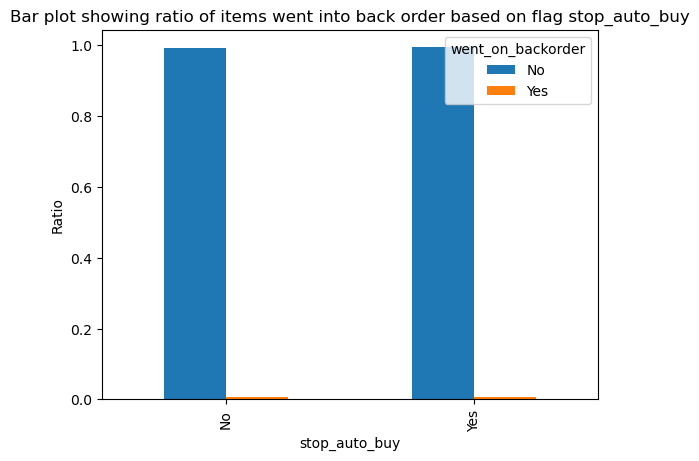

In [69]:
# Bar plot for 'stop_auto_buy'
count = df.groupby(['stop_auto_buy','went_on_backorder']).size().unstack()
ratio = count.T.div(count.T.sum()).T

fig,ax = plt.subplots()
ratio.plot(kind='bar',ax=ax)

ax.set_xlabel('stop_auto_buy')
ax.set_xticklabels(['No','Yes'])
ax.set_ylabel('Ratio')
ax.set_title('Bar plot showing ratio of items went into back order based on flag stop_auto_buy')

1. When stop_auto_buy = No, product did not go to backorder 99.18% of times
2. When stop_auto_buy = Yes, product did not go to backorder 99.27% of times
3. So, the 'stop_auto_buy' flag does not help us in distinguishing whether the product goes to backorder or not as the proportion of classes is equally distributed between both the 'stop_auto_buy' flag values

In [70]:
#df['went_on_backorder'] = df['went_on_backorder'].replace({'Yes': 1, 'No': 0})

In [71]:
# Pair plots for forecast features
#plt.figure()
sns.pairplot(df[['forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'went_on_backorder']], hue = 'went_on_backorder')
#plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C50027B160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Pair plots for sales features
#plt.figure()
sns.pairplot(df[['sales_1_month','sales_3_month','sales_6_month','sales_9_month','went_on_backorder']], hue = 'went_on_backorder')
#plt.show()

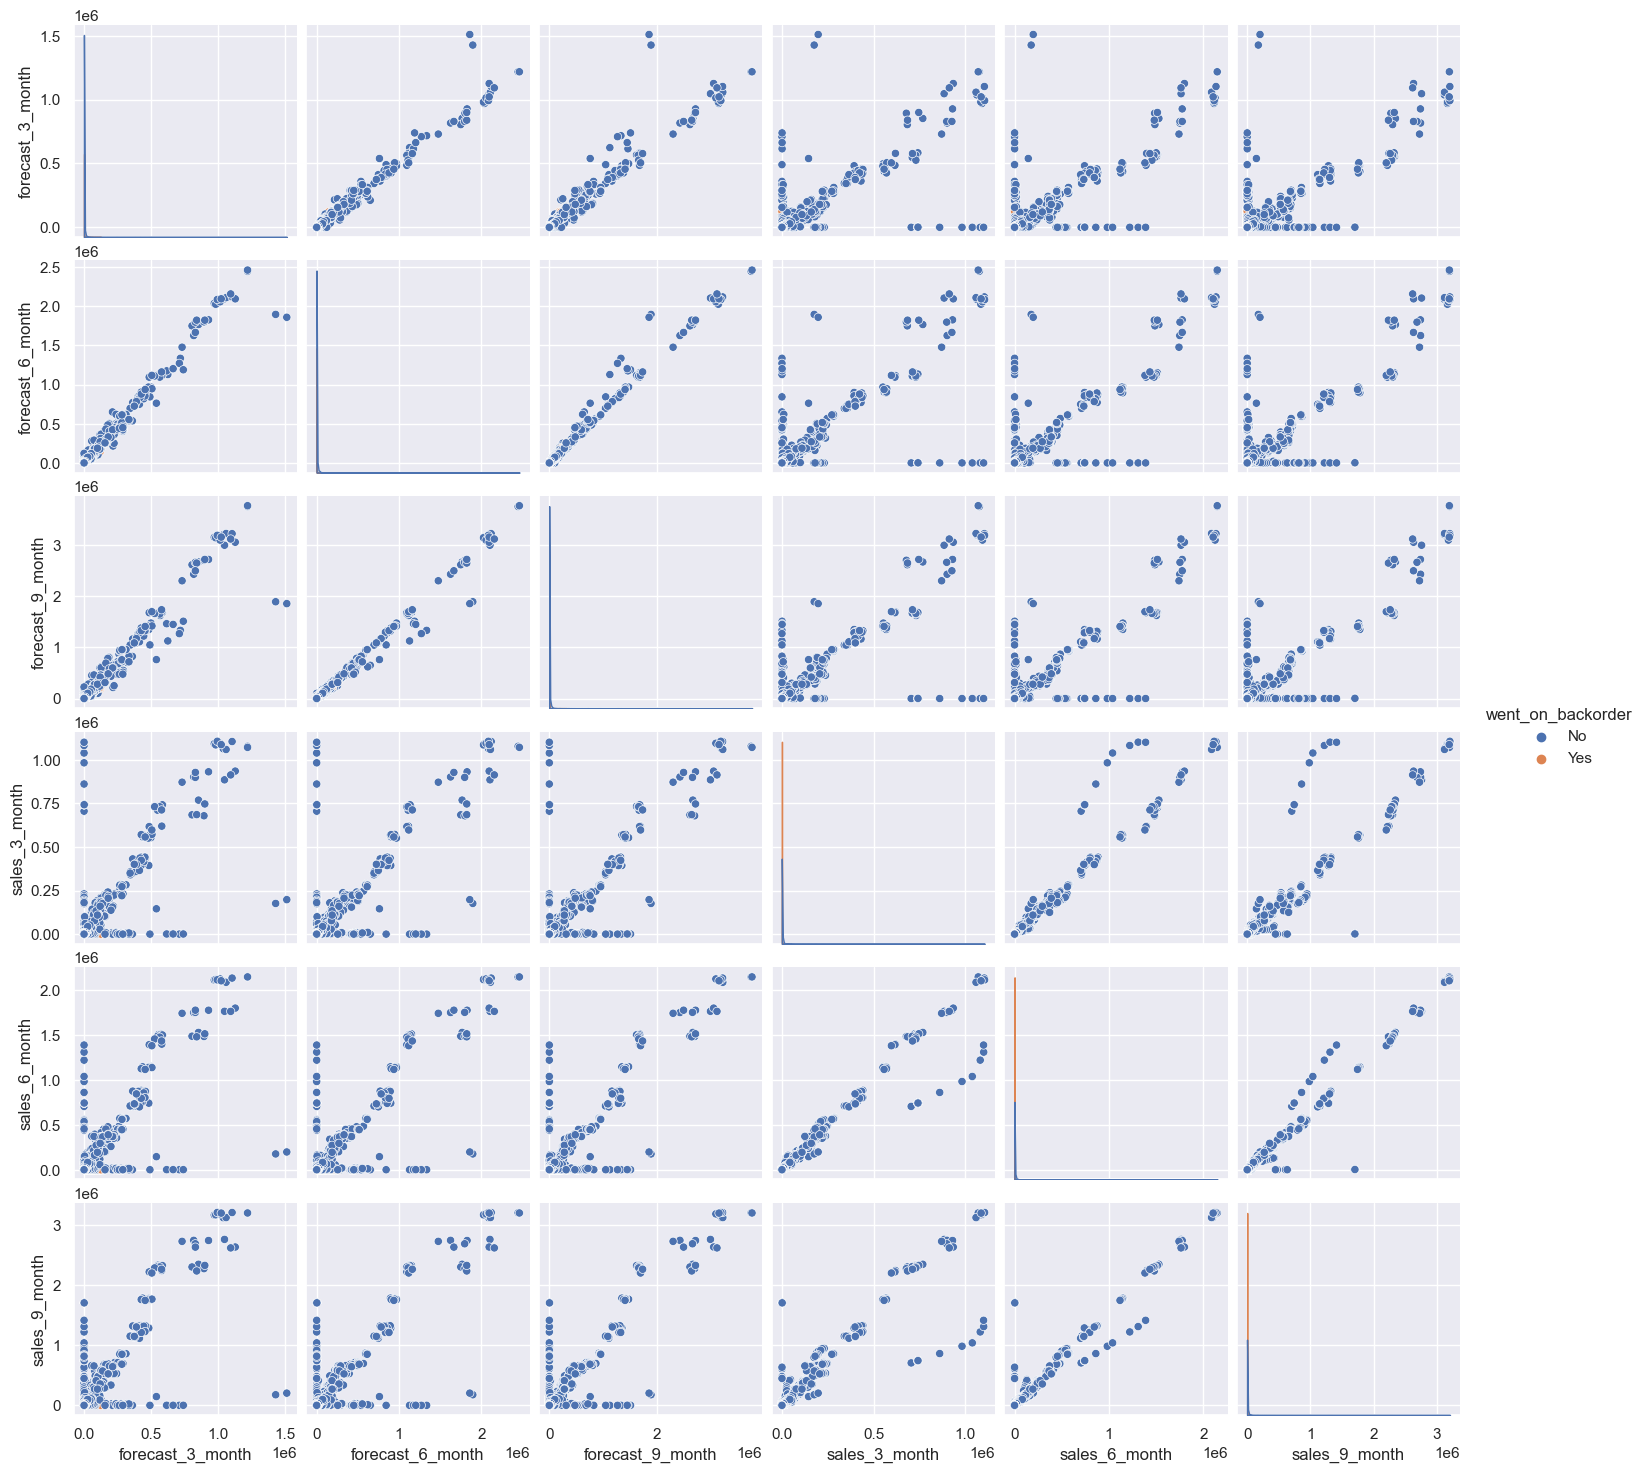

In [51]:
# Pair plots
sns.pairplot(df[['forecast_3_month', 'forecast_6_month', 'forecast_9_month','sales_3_month','sales_6_month','sales_9_month', 'went_on_backorder']], hue = 'went_on_backorder')

<AxesSubplot:>

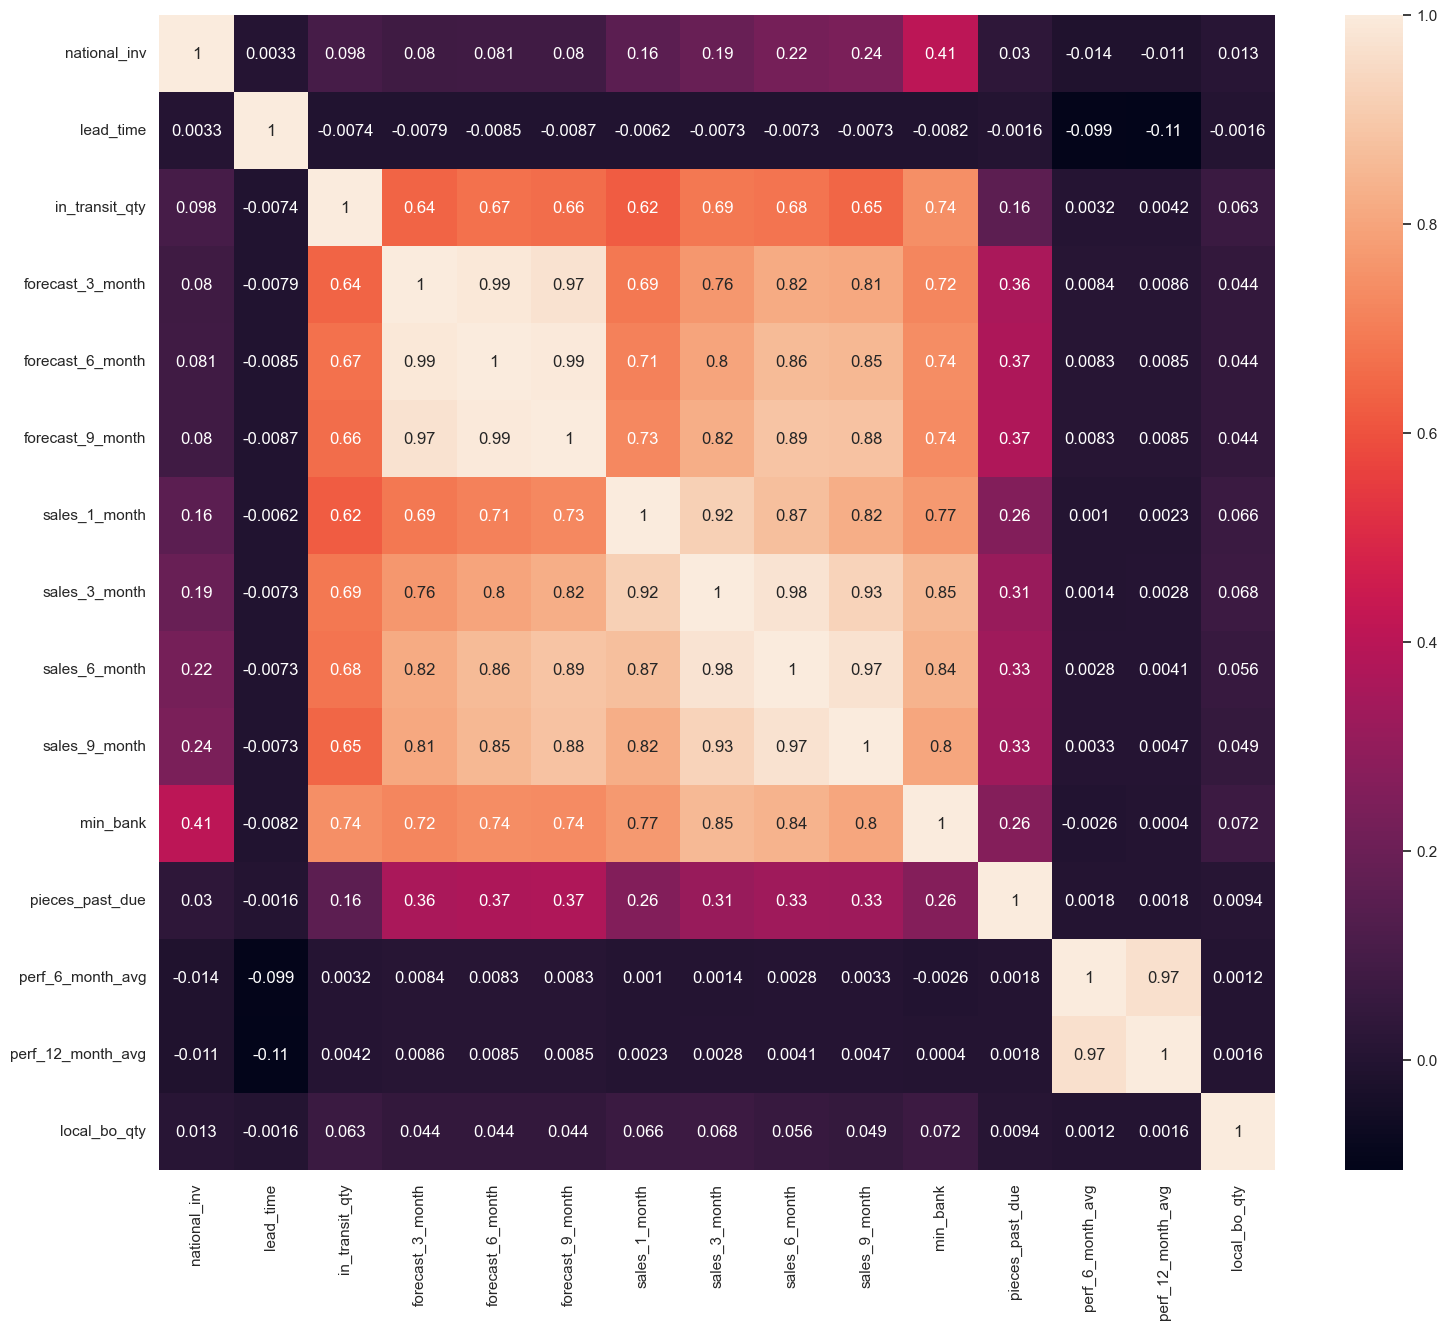

In [50]:
cor = df.corr()
sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True)

C:\Users\manee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'national_inv Distribution')

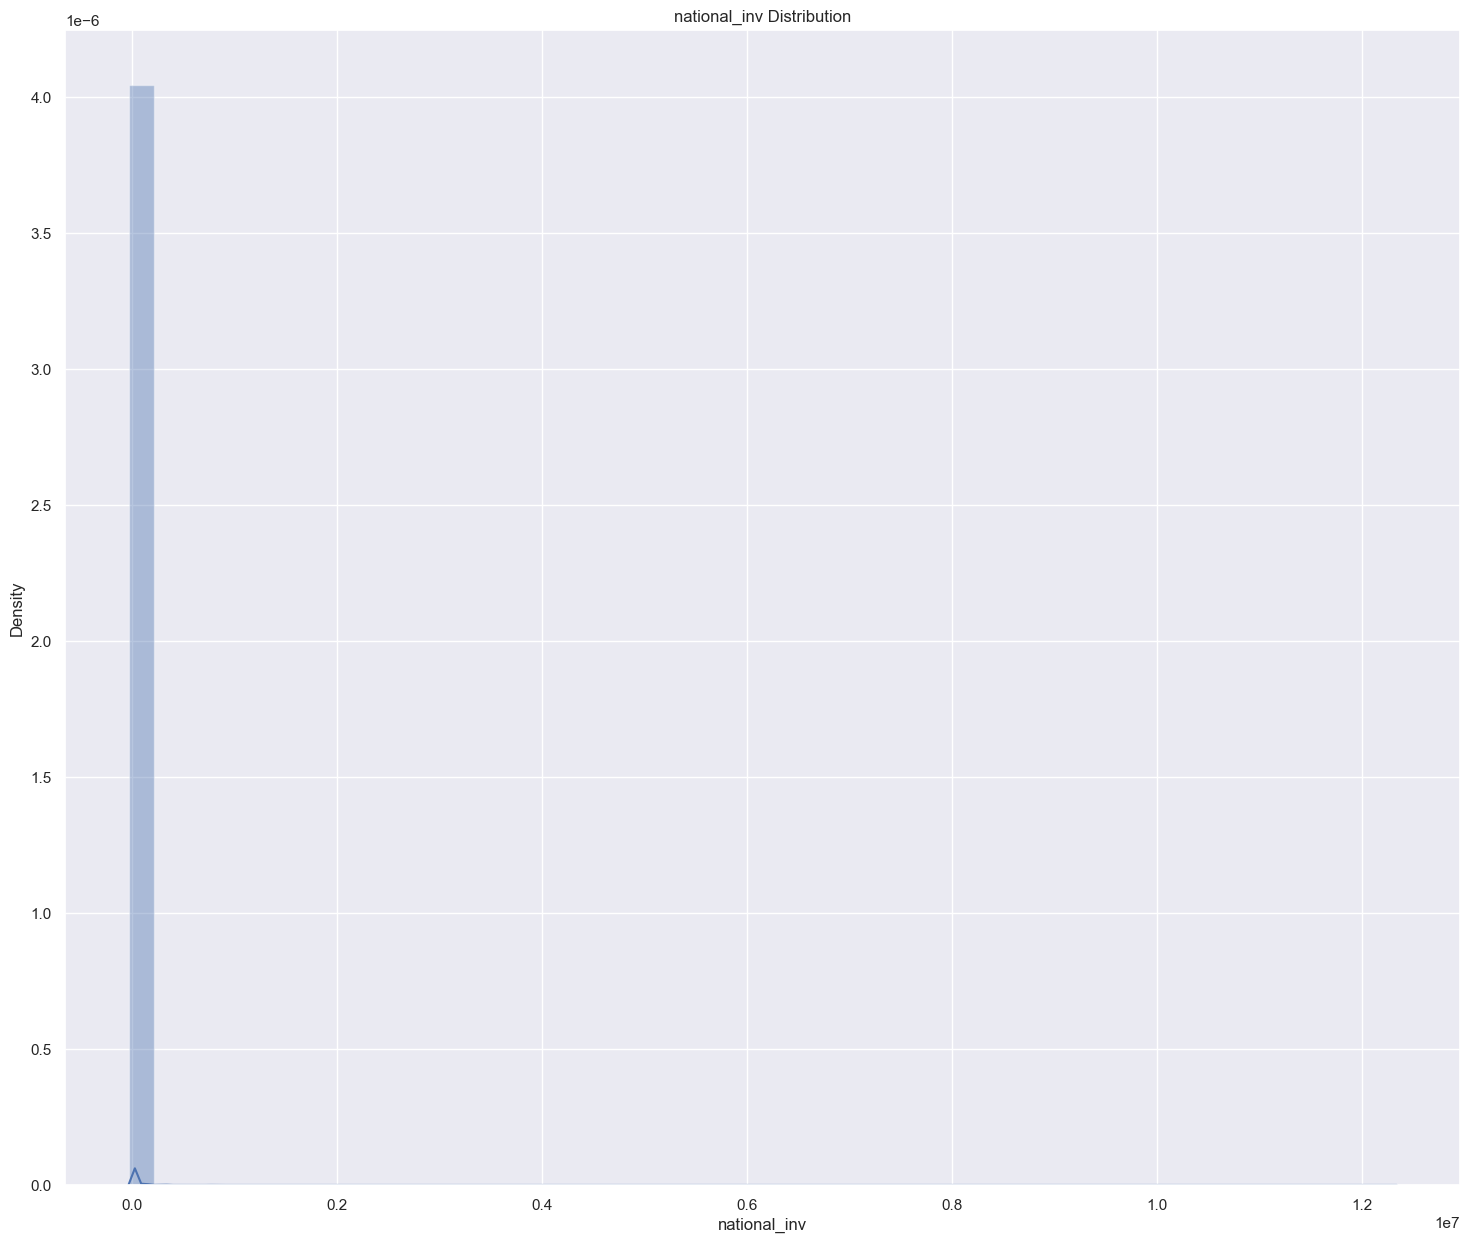

In [53]:
# Plotting distribution of national_inv
sns.distplot(df['national_inv'])
plt.title('national_inv Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\540180250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lead_time'])


Text(0.5, 1.0, 'lead_time Distribution')

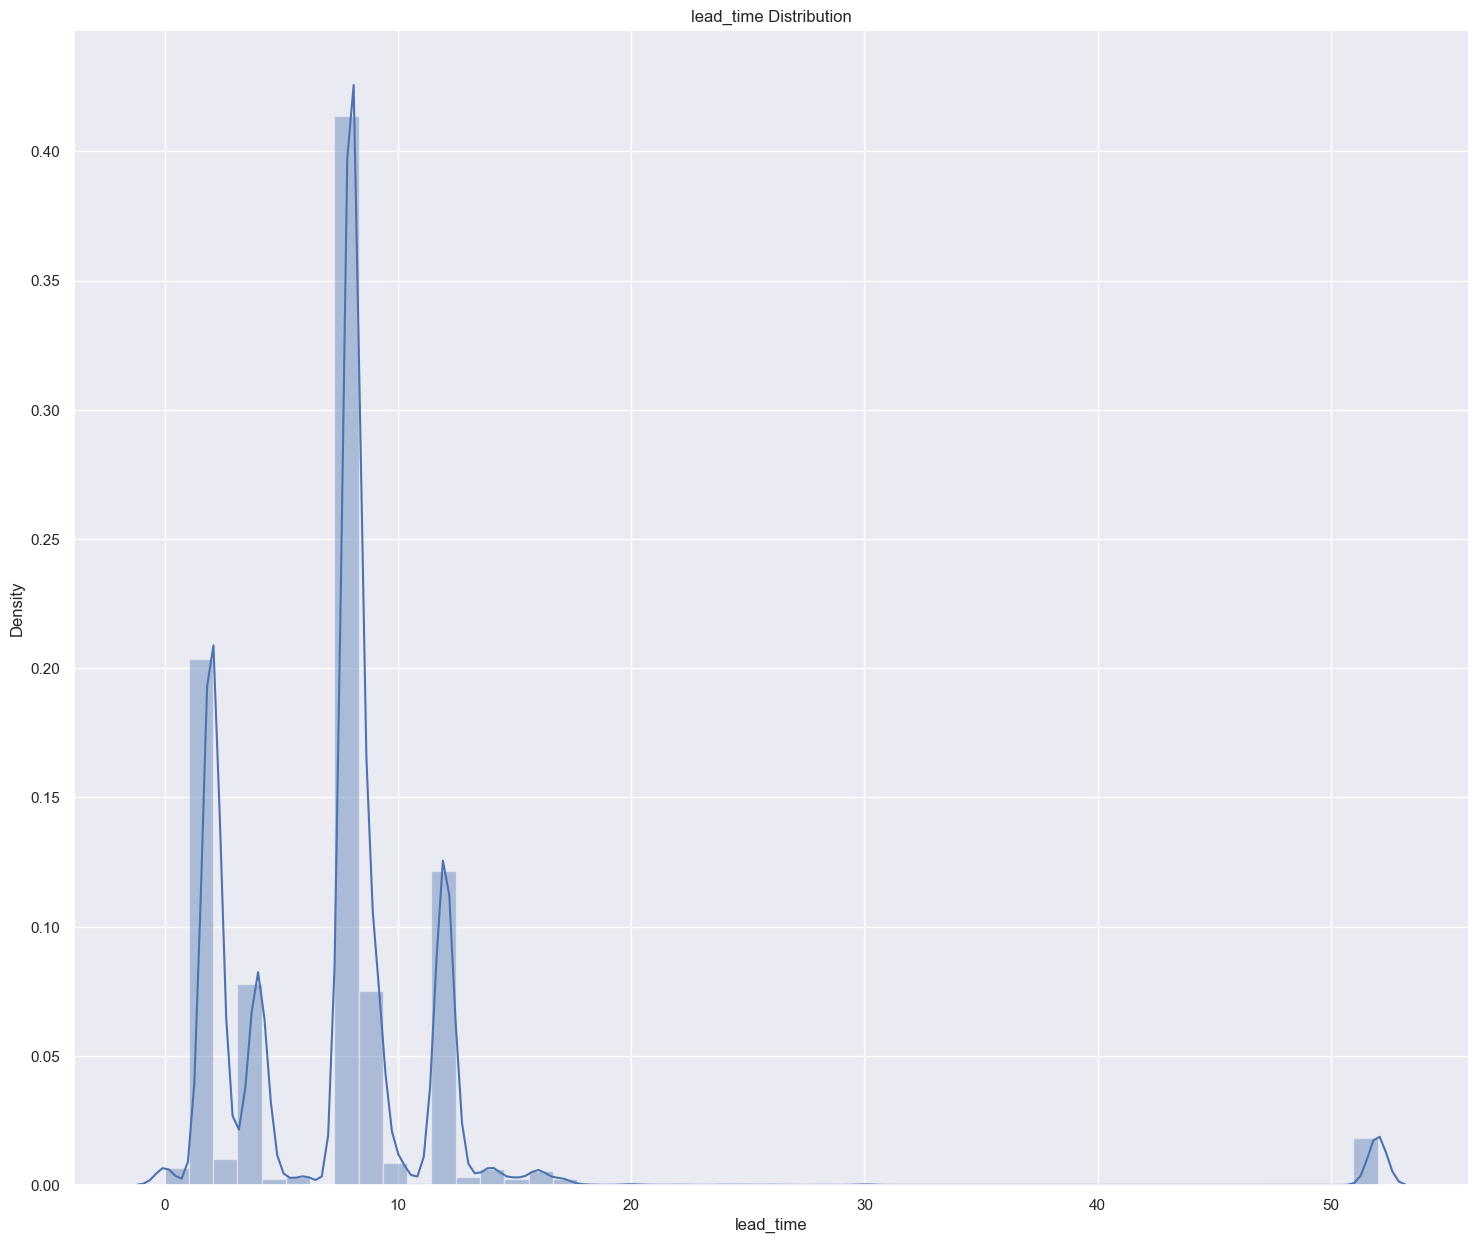

In [212]:
# Plotting distribution of lead_time
sns.distplot(df['lead_time'])
plt.title('lead_time Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\2314292132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['in_transit_qty'])


Text(0.5, 1.0, 'in_transit_qty Distribution')

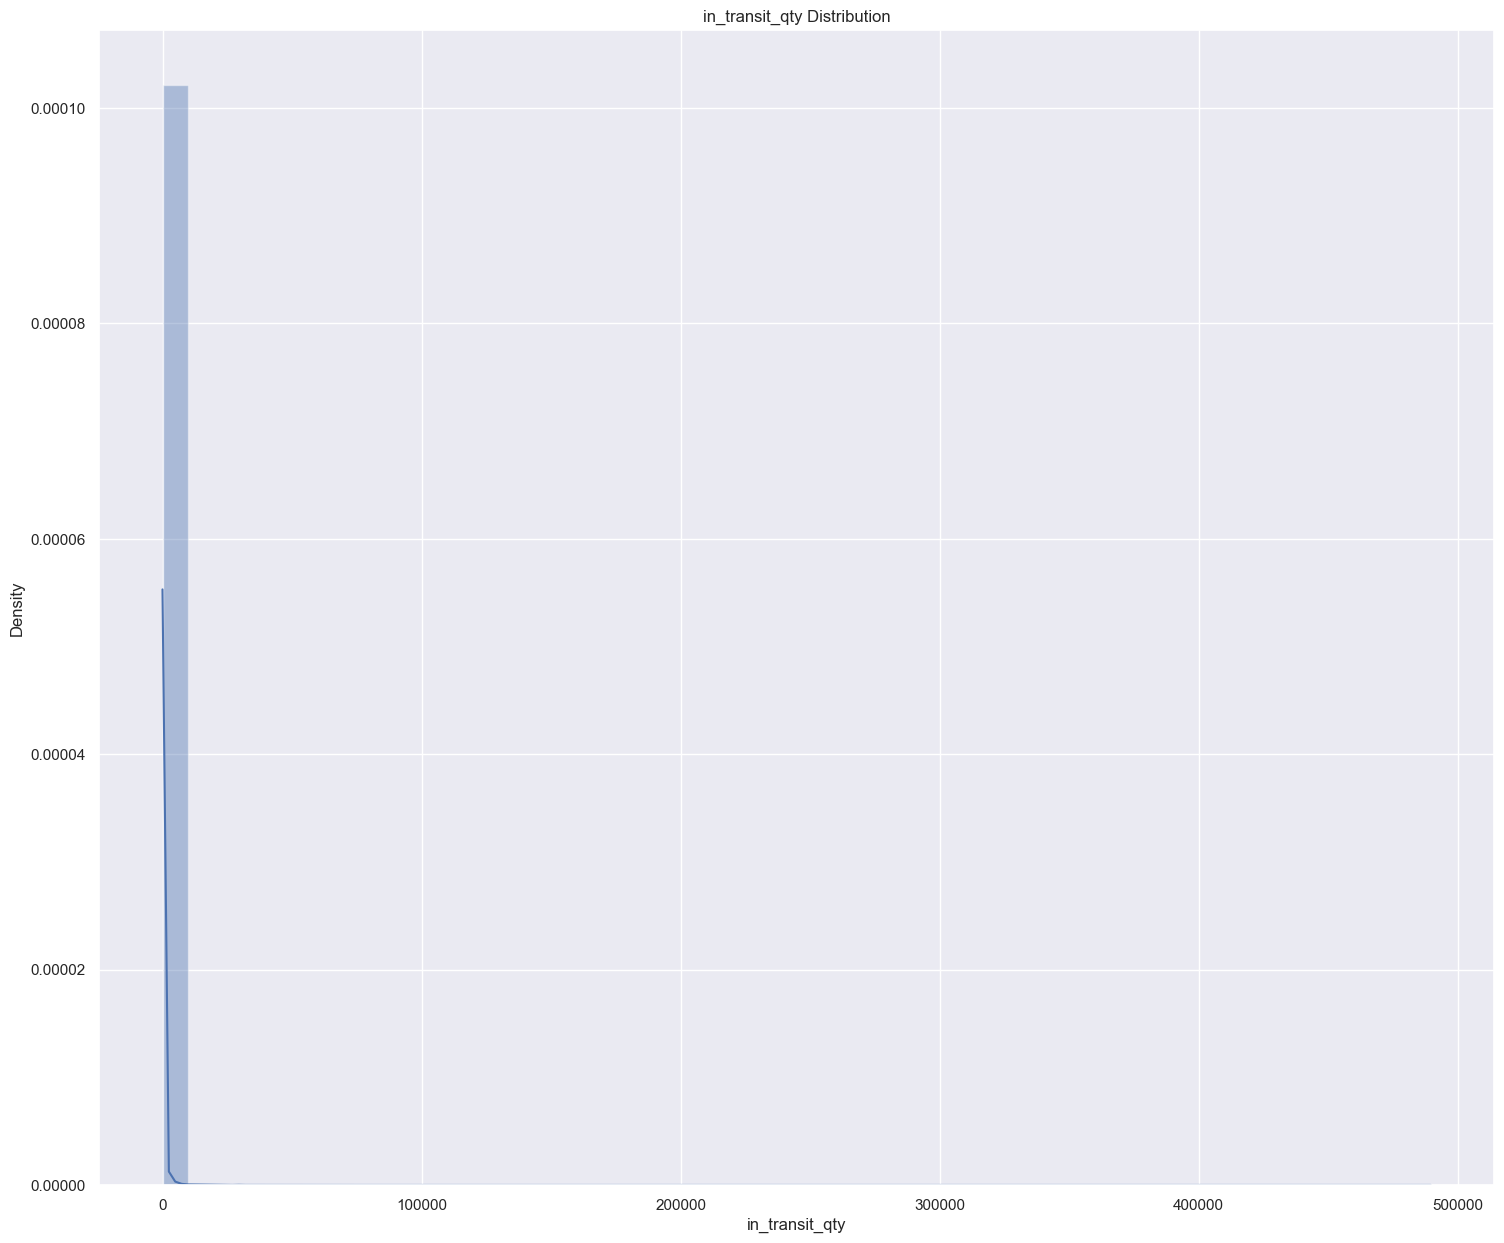

In [213]:
# Plotting distribution of in_transit_qty
sns.distplot(df['in_transit_qty'])
plt.title('in_transit_qty Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\755239193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['forecast_3_month'])


Text(0.5, 1.0, 'forecast_3_month Distribution')

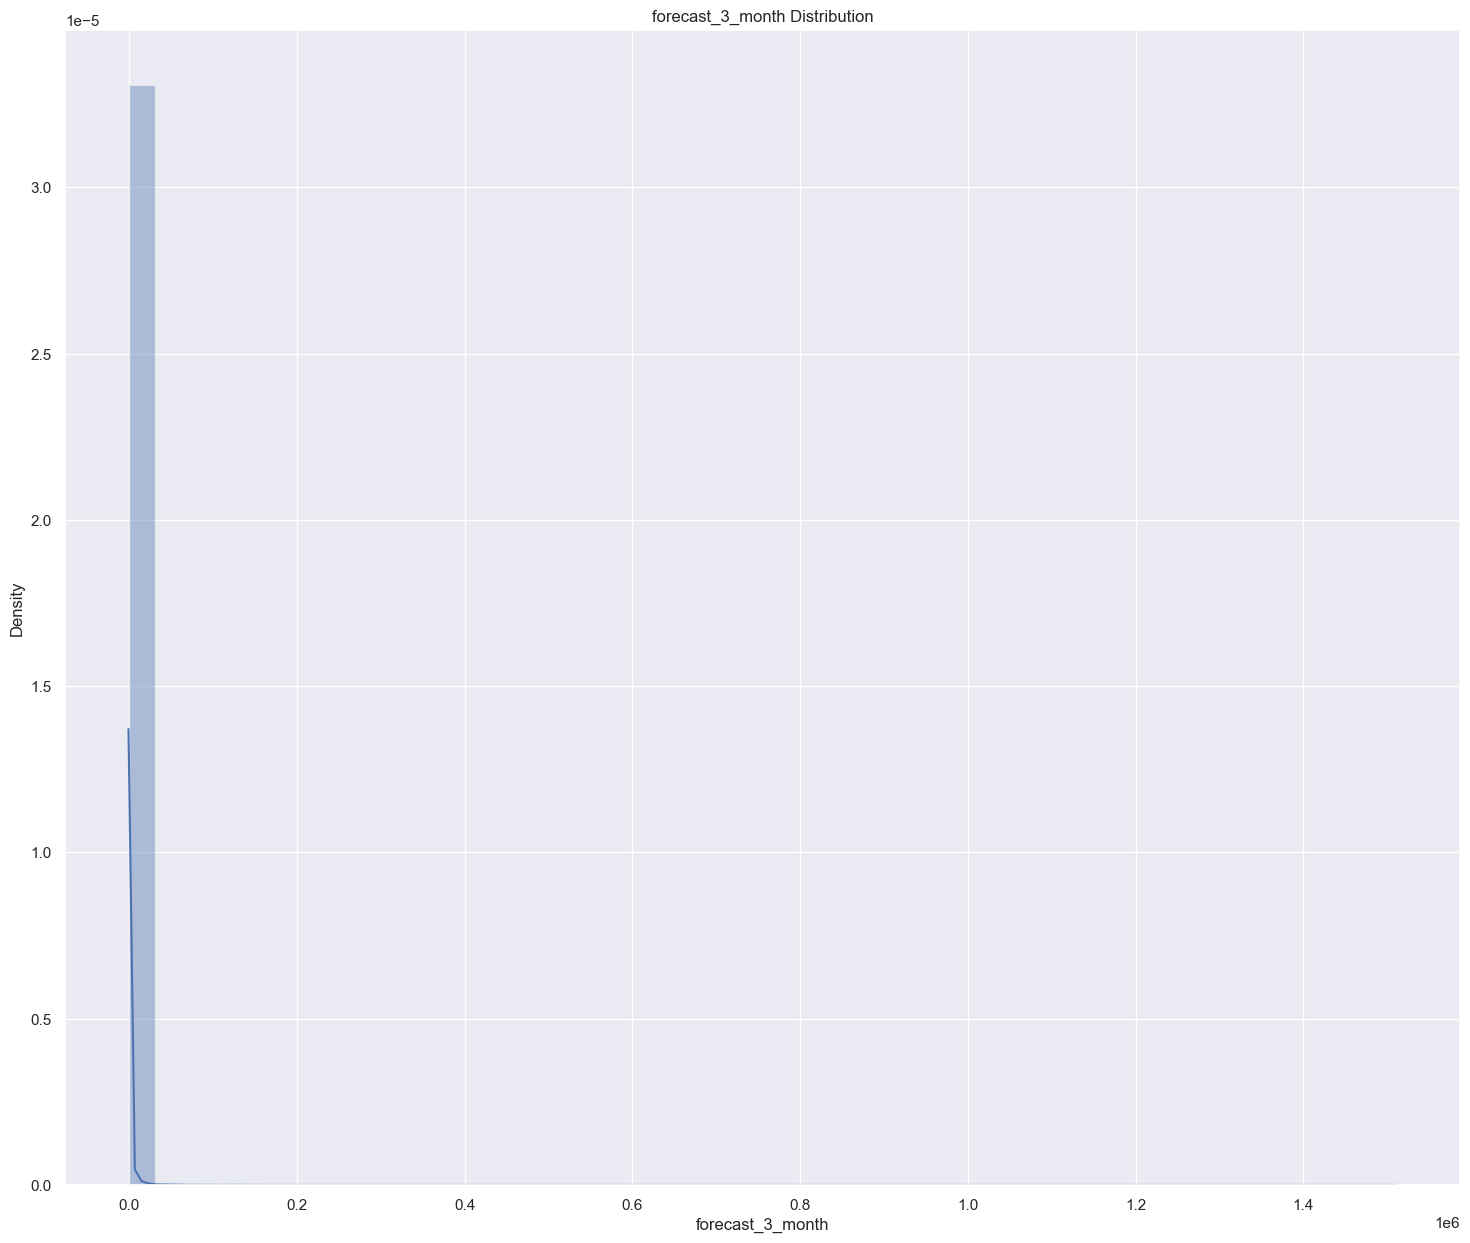

In [214]:
# Plotting distribution of forecast_3_month
sns.distplot(df['forecast_3_month'])
plt.title('forecast_3_month Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\1473702053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['forecast_6_month'])


Text(0.5, 1.0, 'forecast_6_month Distribution')

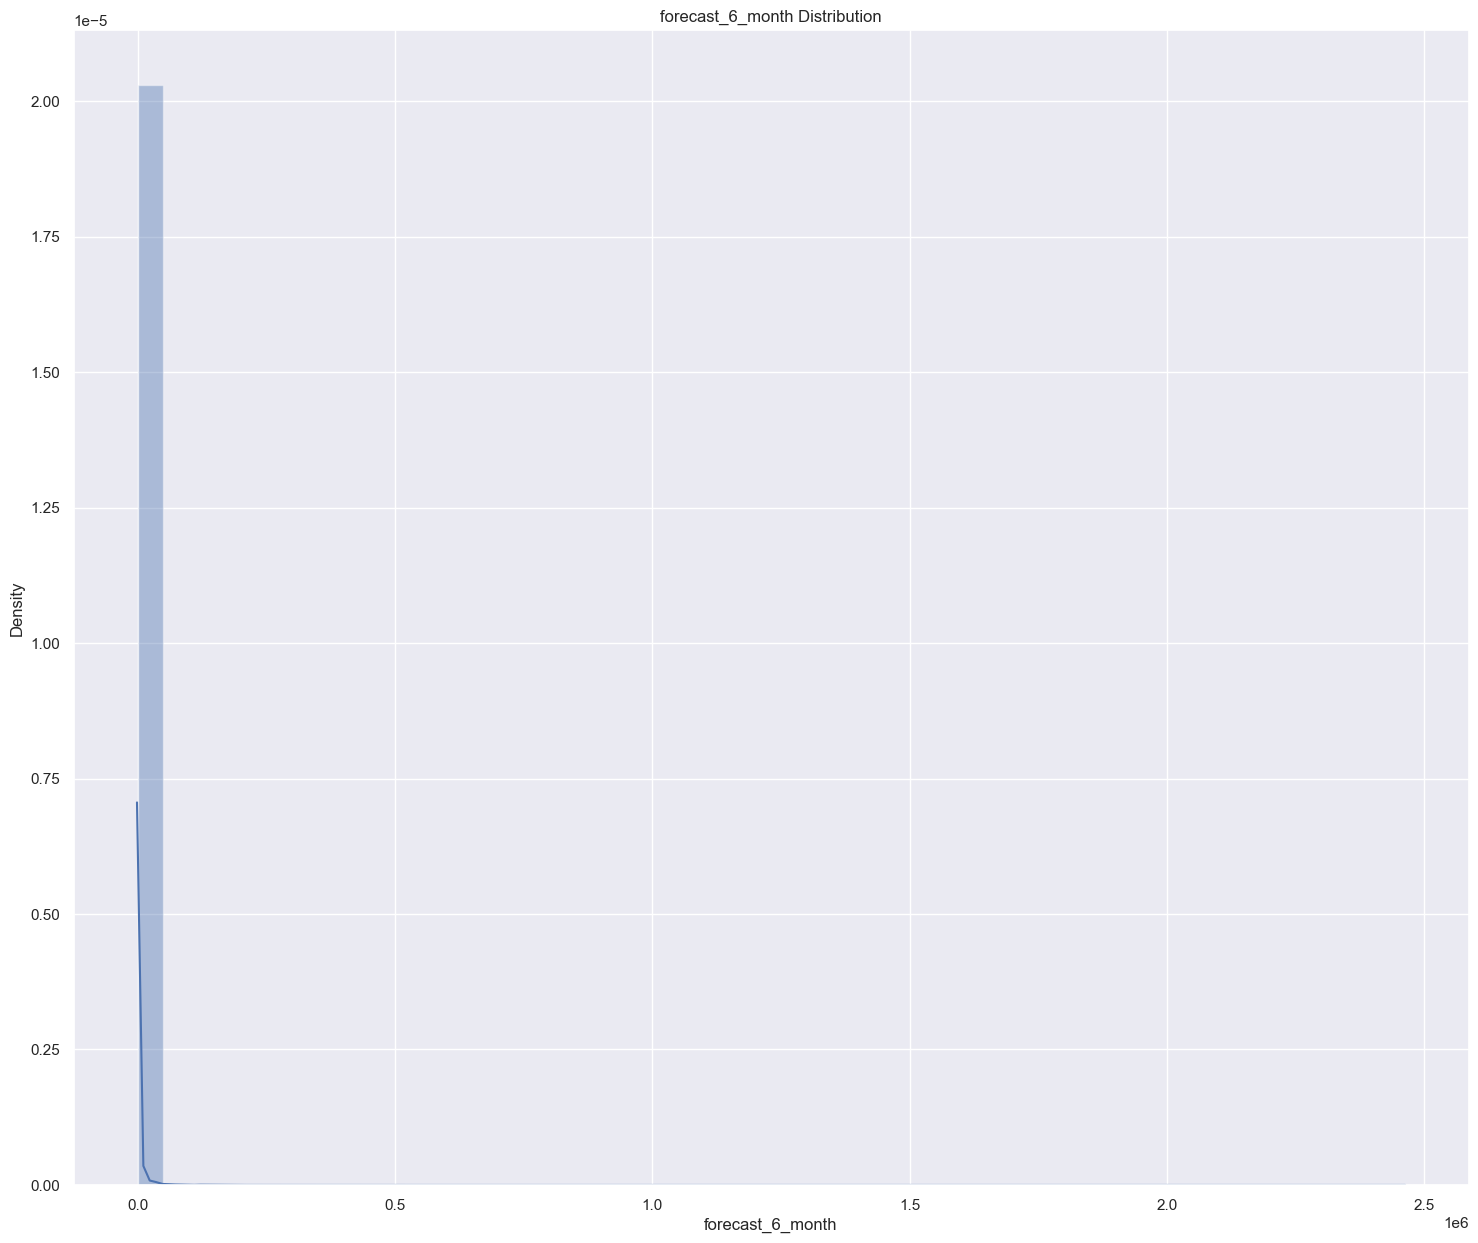

In [215]:
# Plotting distribution of forecast_6_month
sns.distplot(df['forecast_6_month'])
plt.title('forecast_6_month Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\3188745143.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['forecast_9_month'])


Text(0.5, 1.0, 'forecast_9_month Distribution')

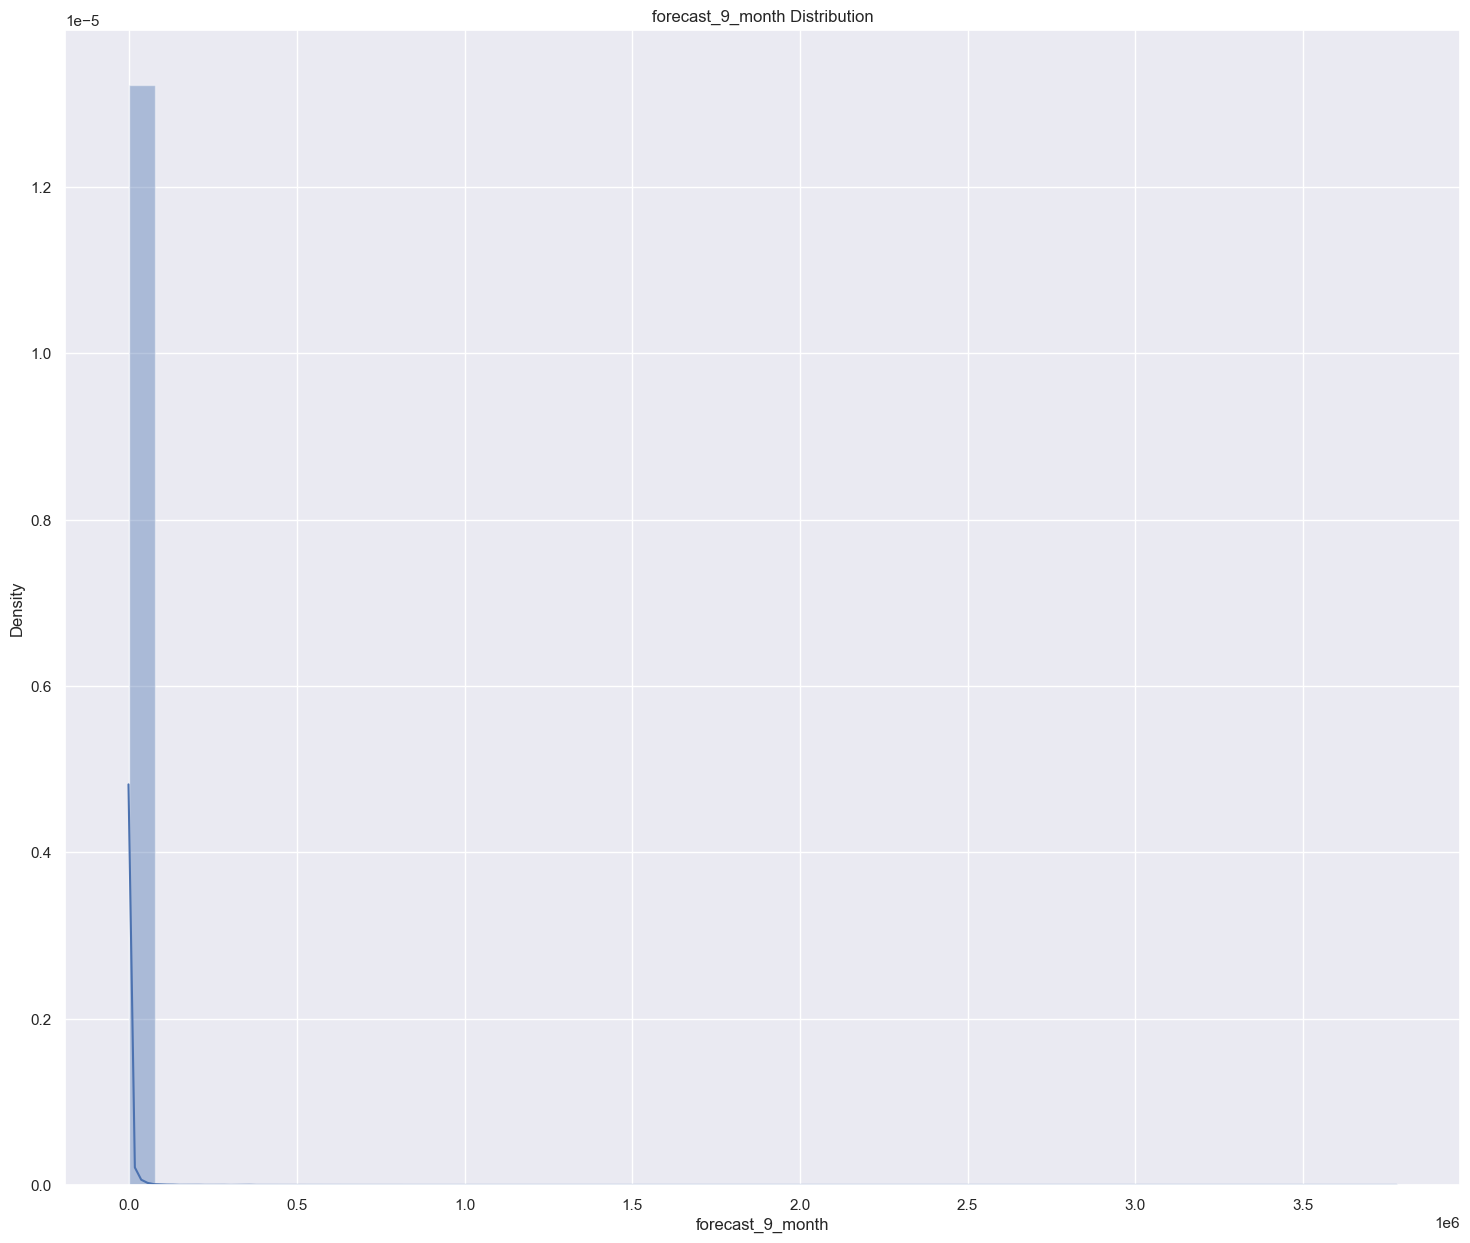

In [216]:
# Plotting distribution of forecast_9_month
sns.distplot(df['forecast_9_month'])
plt.title('forecast_9_month Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\1064143034.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales_1_month'])


Text(0.5, 1.0, 'sales_1_month Distribution')

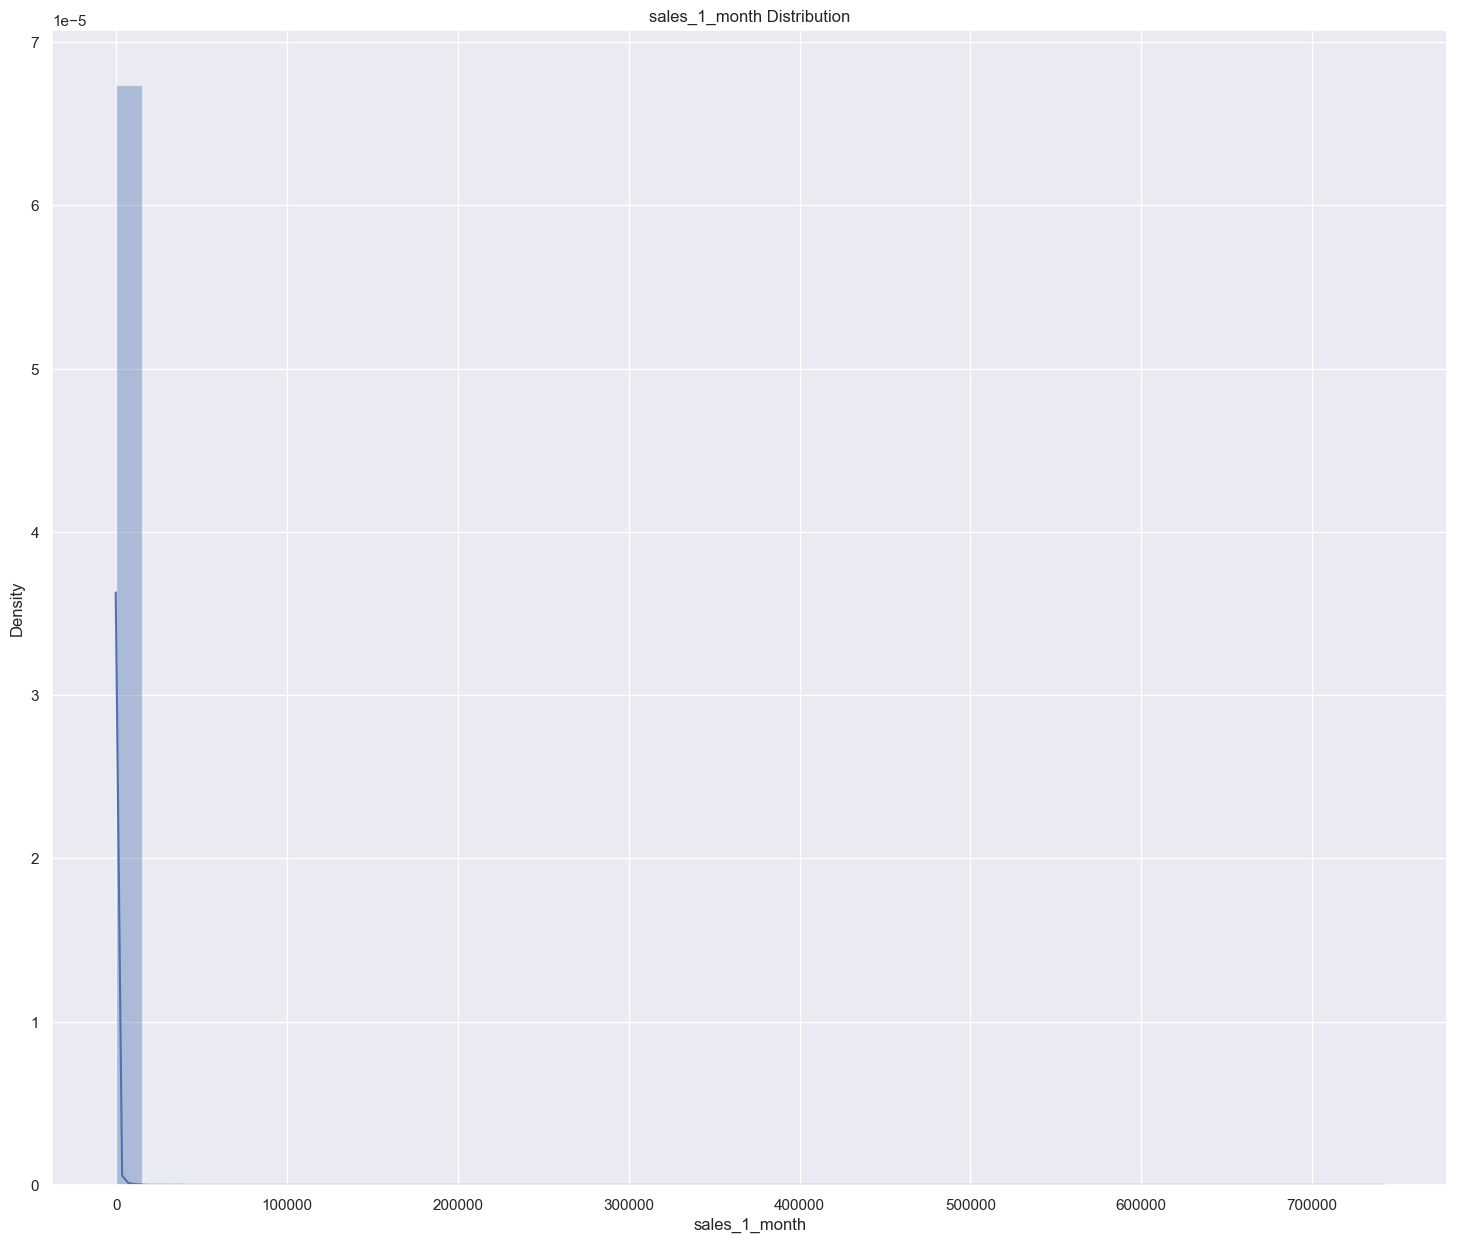

In [217]:
# Plotting distribution of sales_1_month
sns.distplot(df['sales_1_month'])
plt.title('sales_1_month Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\184503419.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales_3_month'])


Text(0.5, 1.0, 'sales_3_month Distribution')

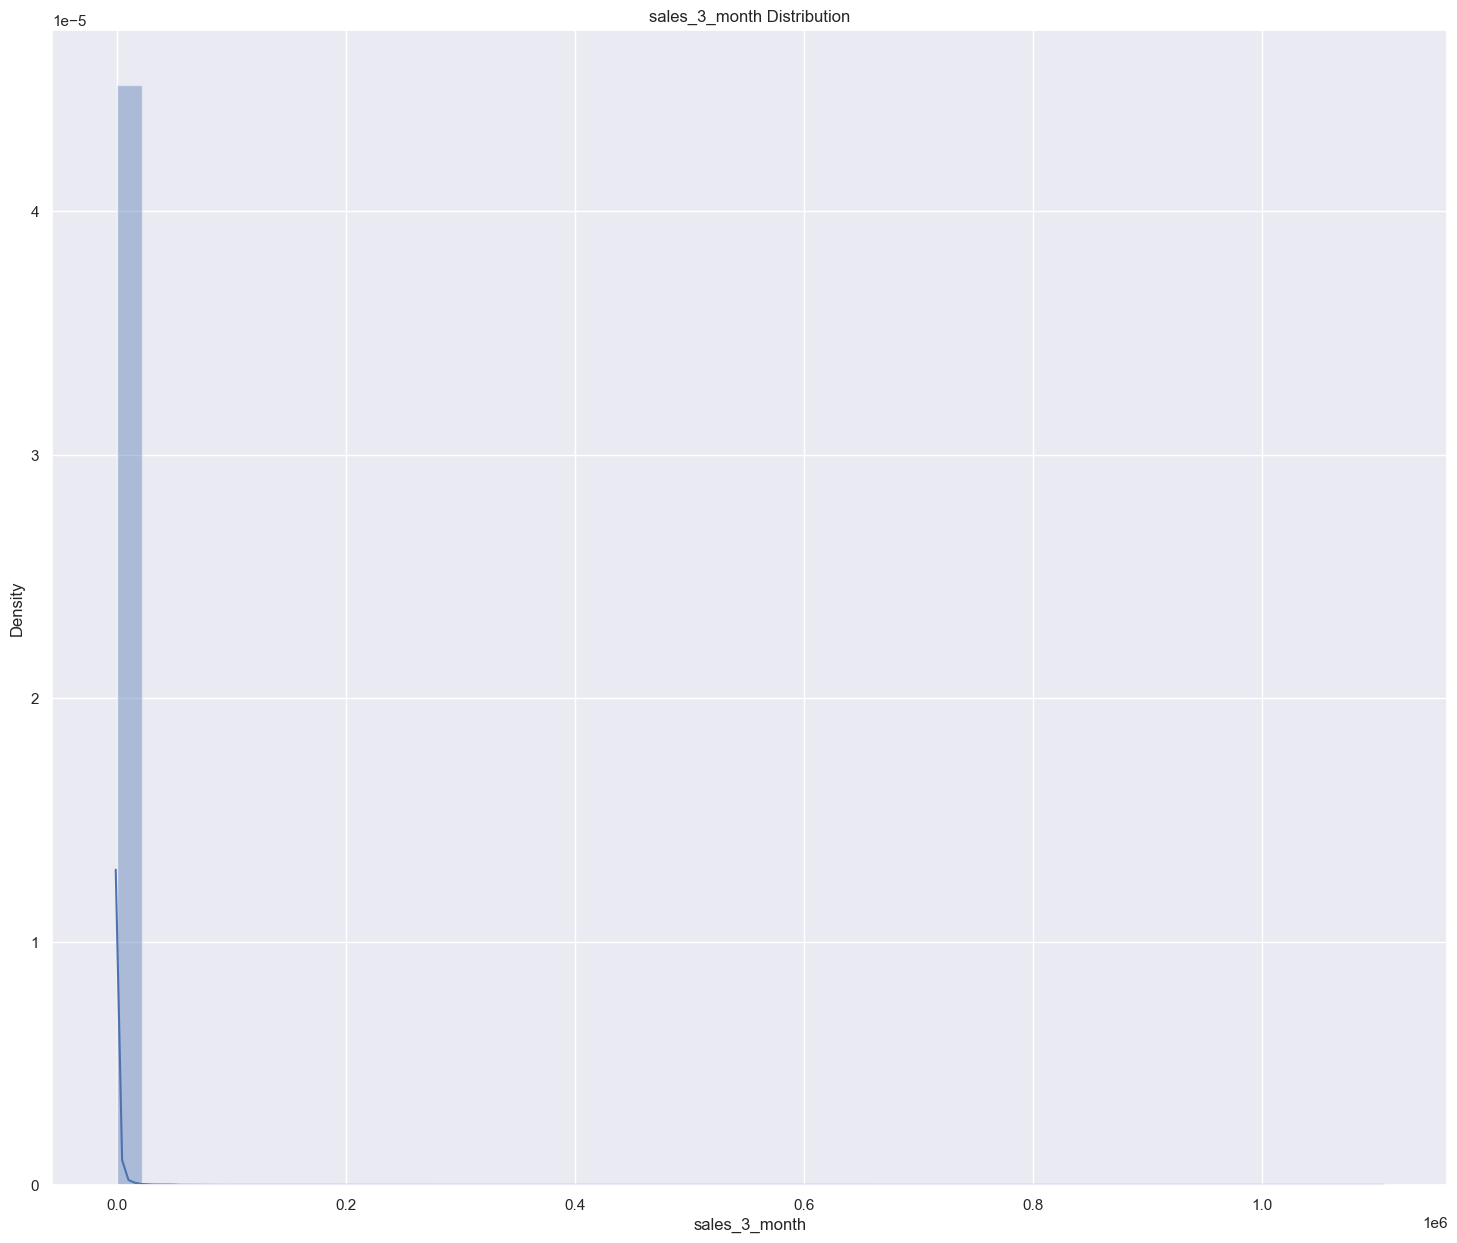

In [218]:
# Plotting distribution of sales_3_month
sns.distplot(df['sales_3_month'])
plt.title('sales_3_month Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\1114827541.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales_6_month'])


Text(0.5, 1.0, 'sales_6_month Distribution')

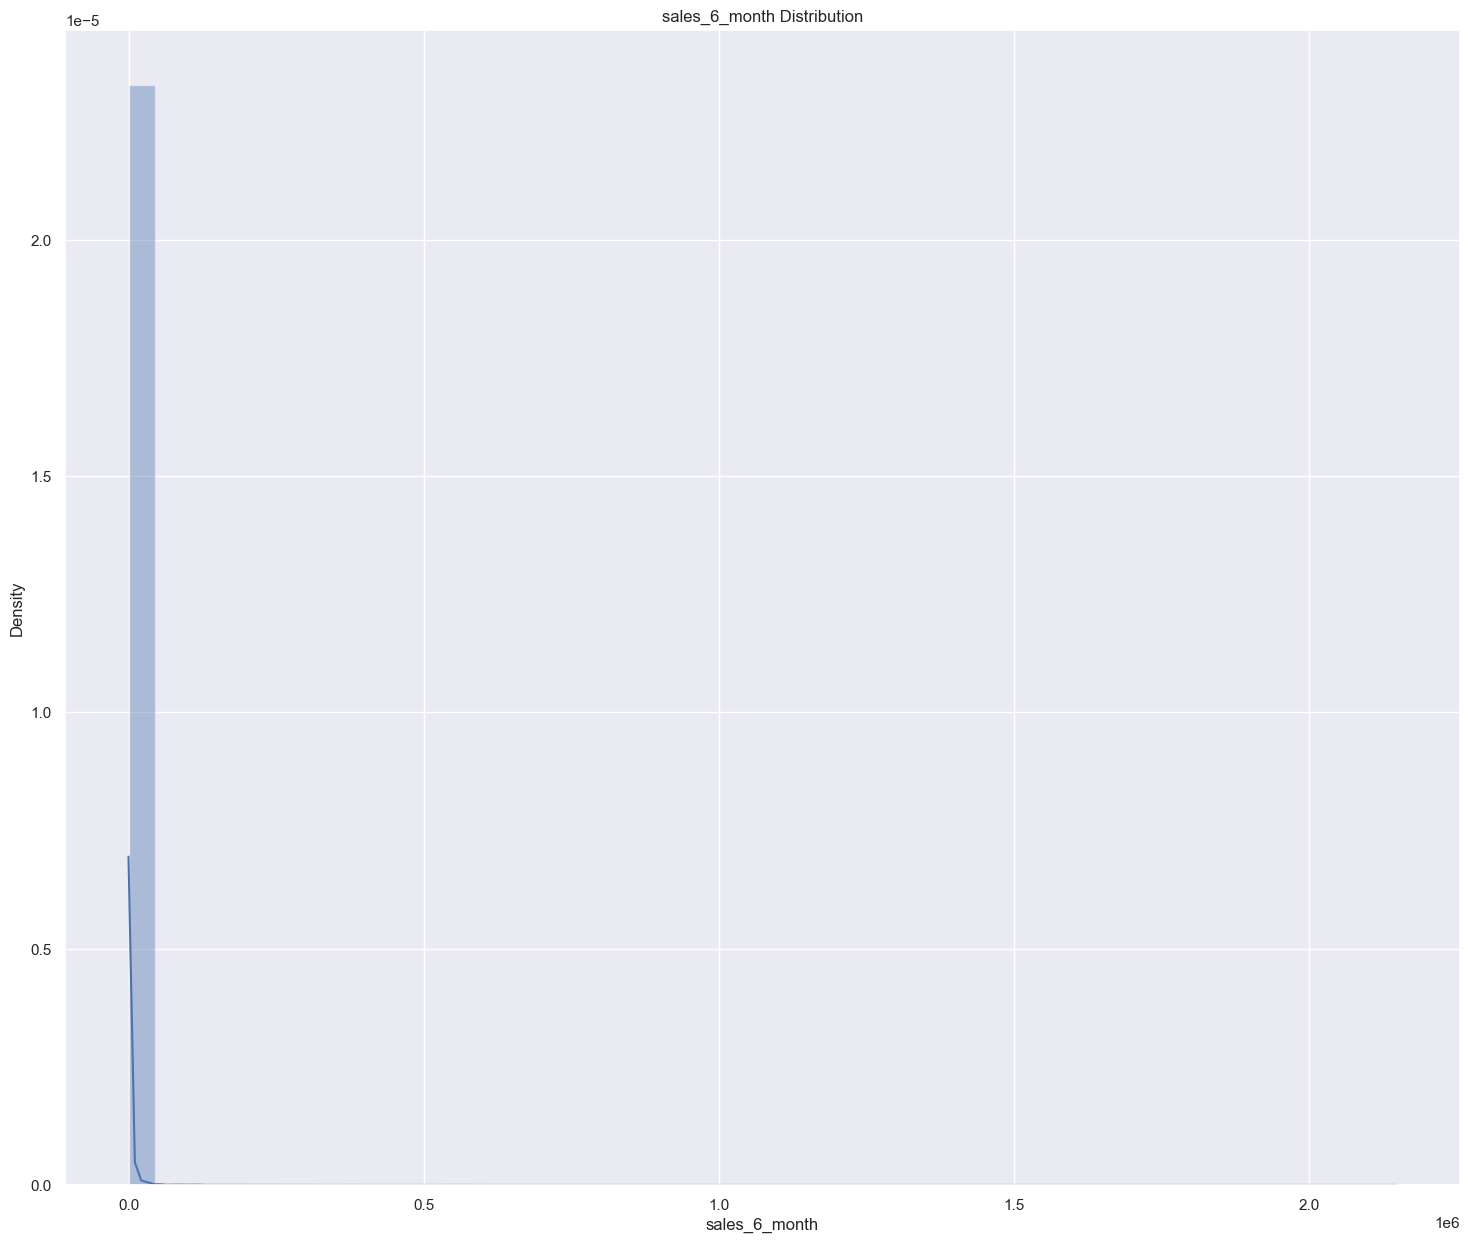

In [219]:
# Plotting distribution of sales_6_month
sns.distplot(df['sales_6_month'])
plt.title('sales_6_month Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\593511244.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales_9_month'])


Text(0.5, 1.0, 'sales_9_month Distribution')

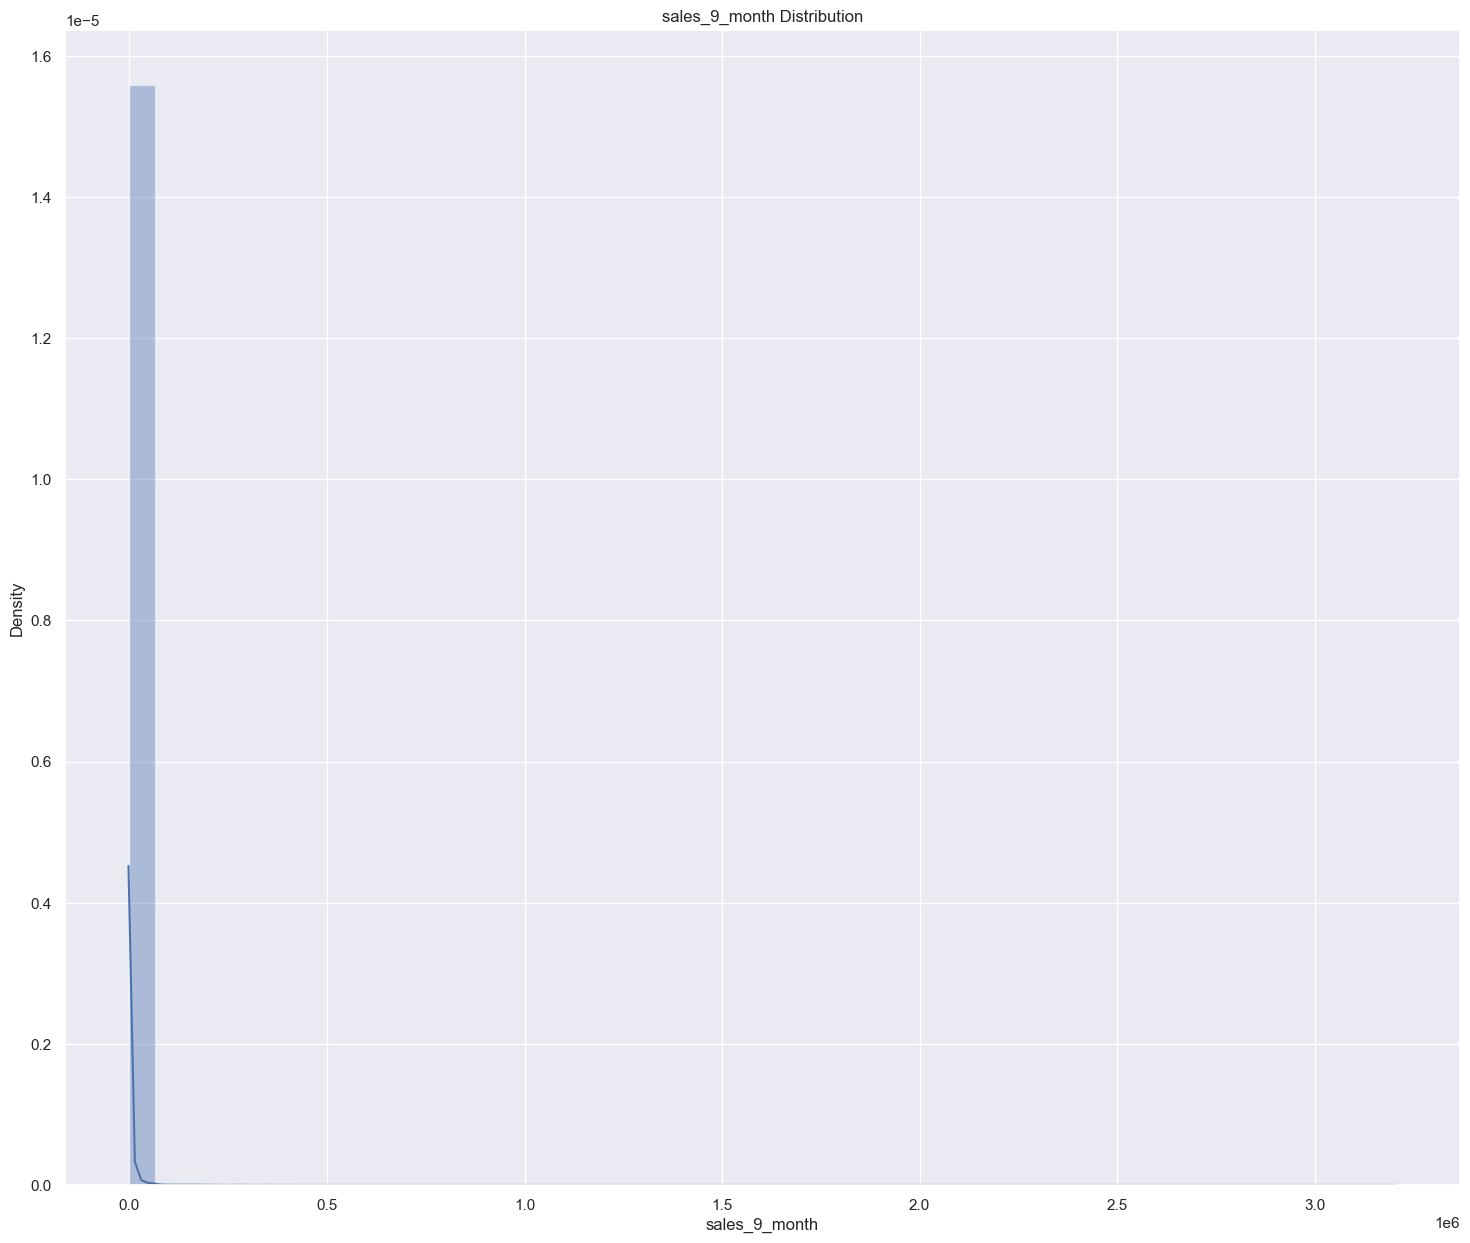

In [220]:
# Plotting distribution of sales_9_month
sns.distplot(df['sales_9_month'])
plt.title('sales_9_month Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\285992804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['min_bank'])


Text(0.5, 1.0, 'min_bank Distribution')

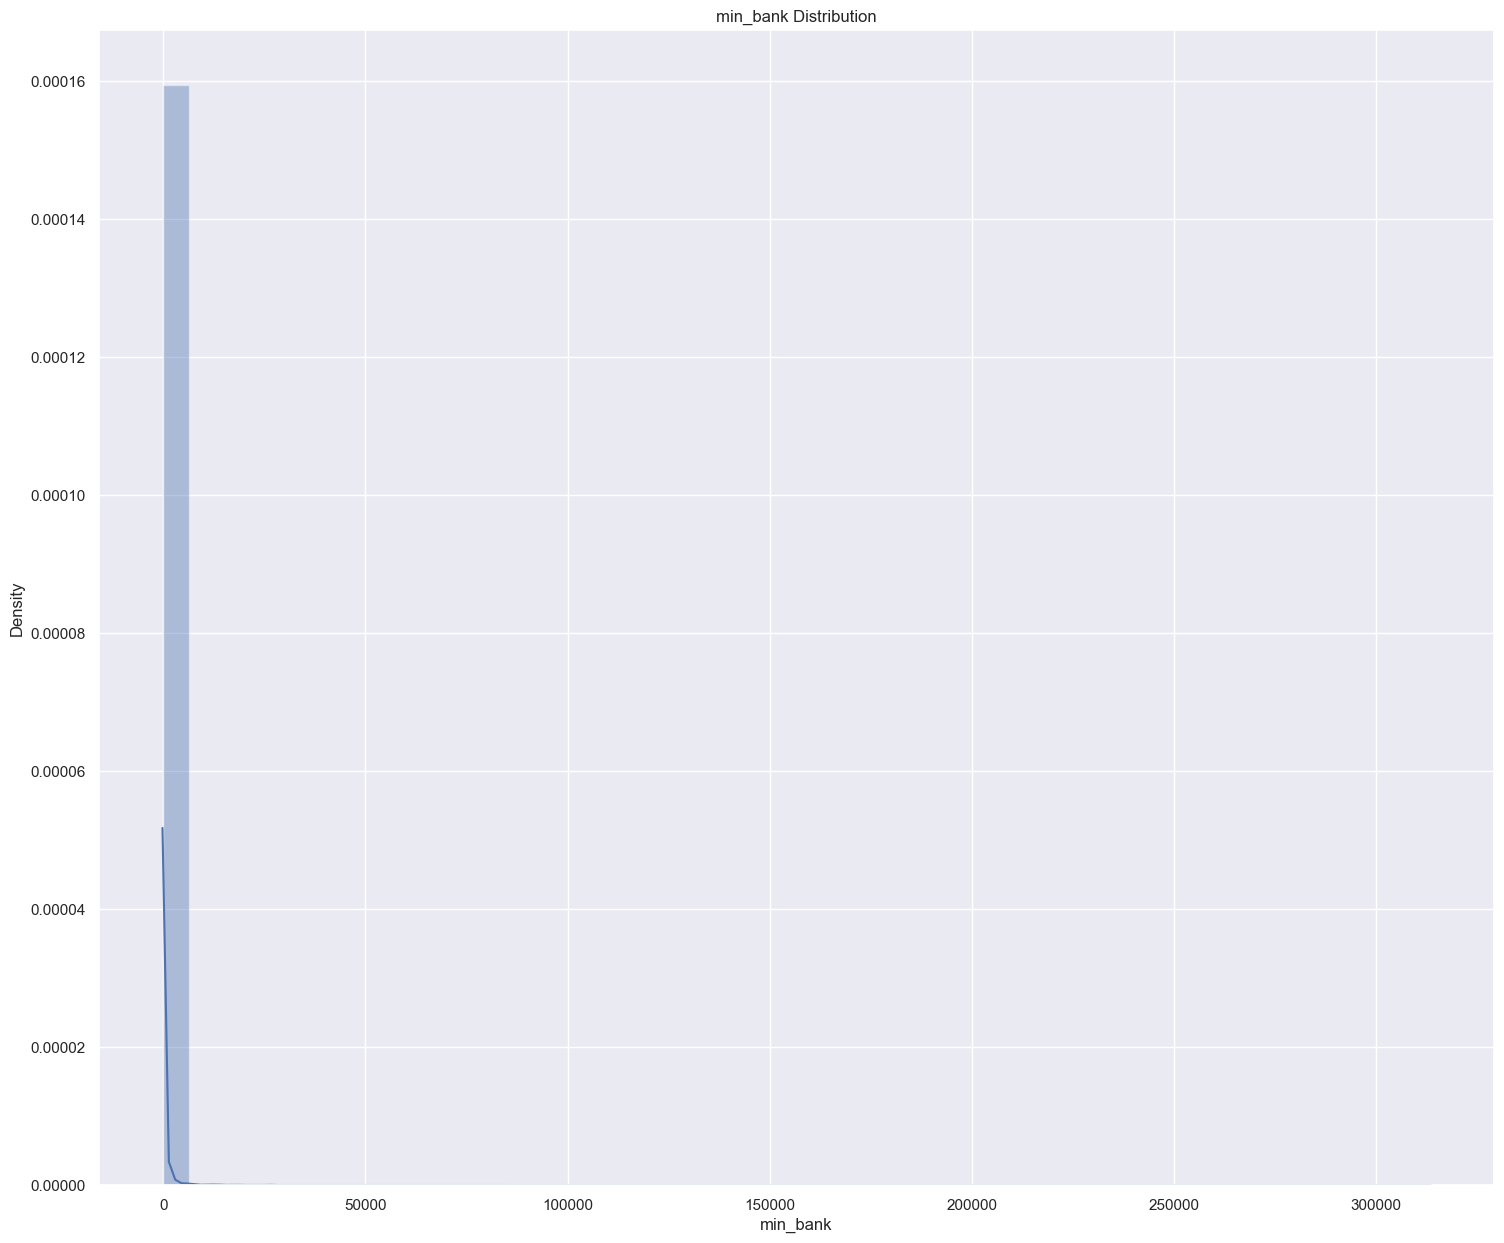

In [221]:
# Plotting distribution of min_bank
sns.distplot(df['min_bank'])
plt.title('min_bank Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\3294841299.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pieces_past_due'])


Text(0.5, 1.0, 'pieces_past_due Distribution')

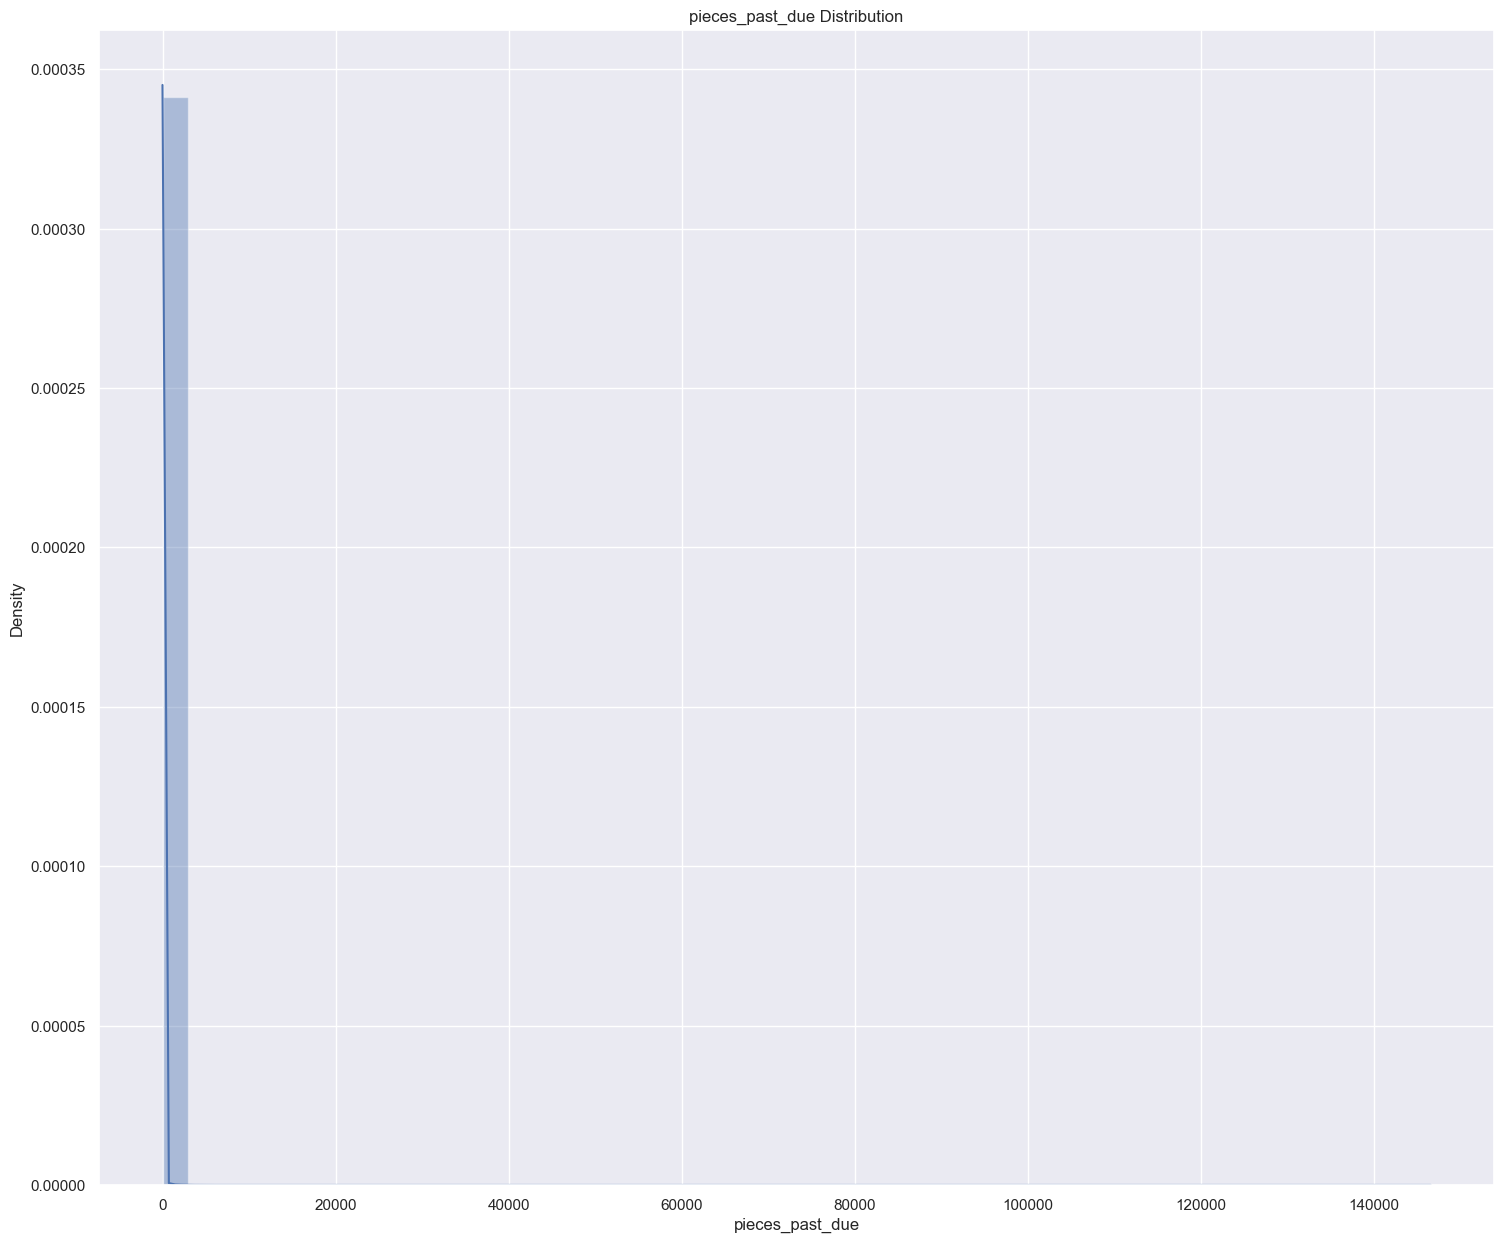

In [222]:
# Plotting distribution of pieces_past_due
sns.distplot(df['pieces_past_due'])
plt.title('pieces_past_due Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\653783966.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['perf_6_month_avg'])


Text(0.5, 1.0, 'perf_6_month_avg Distribution')

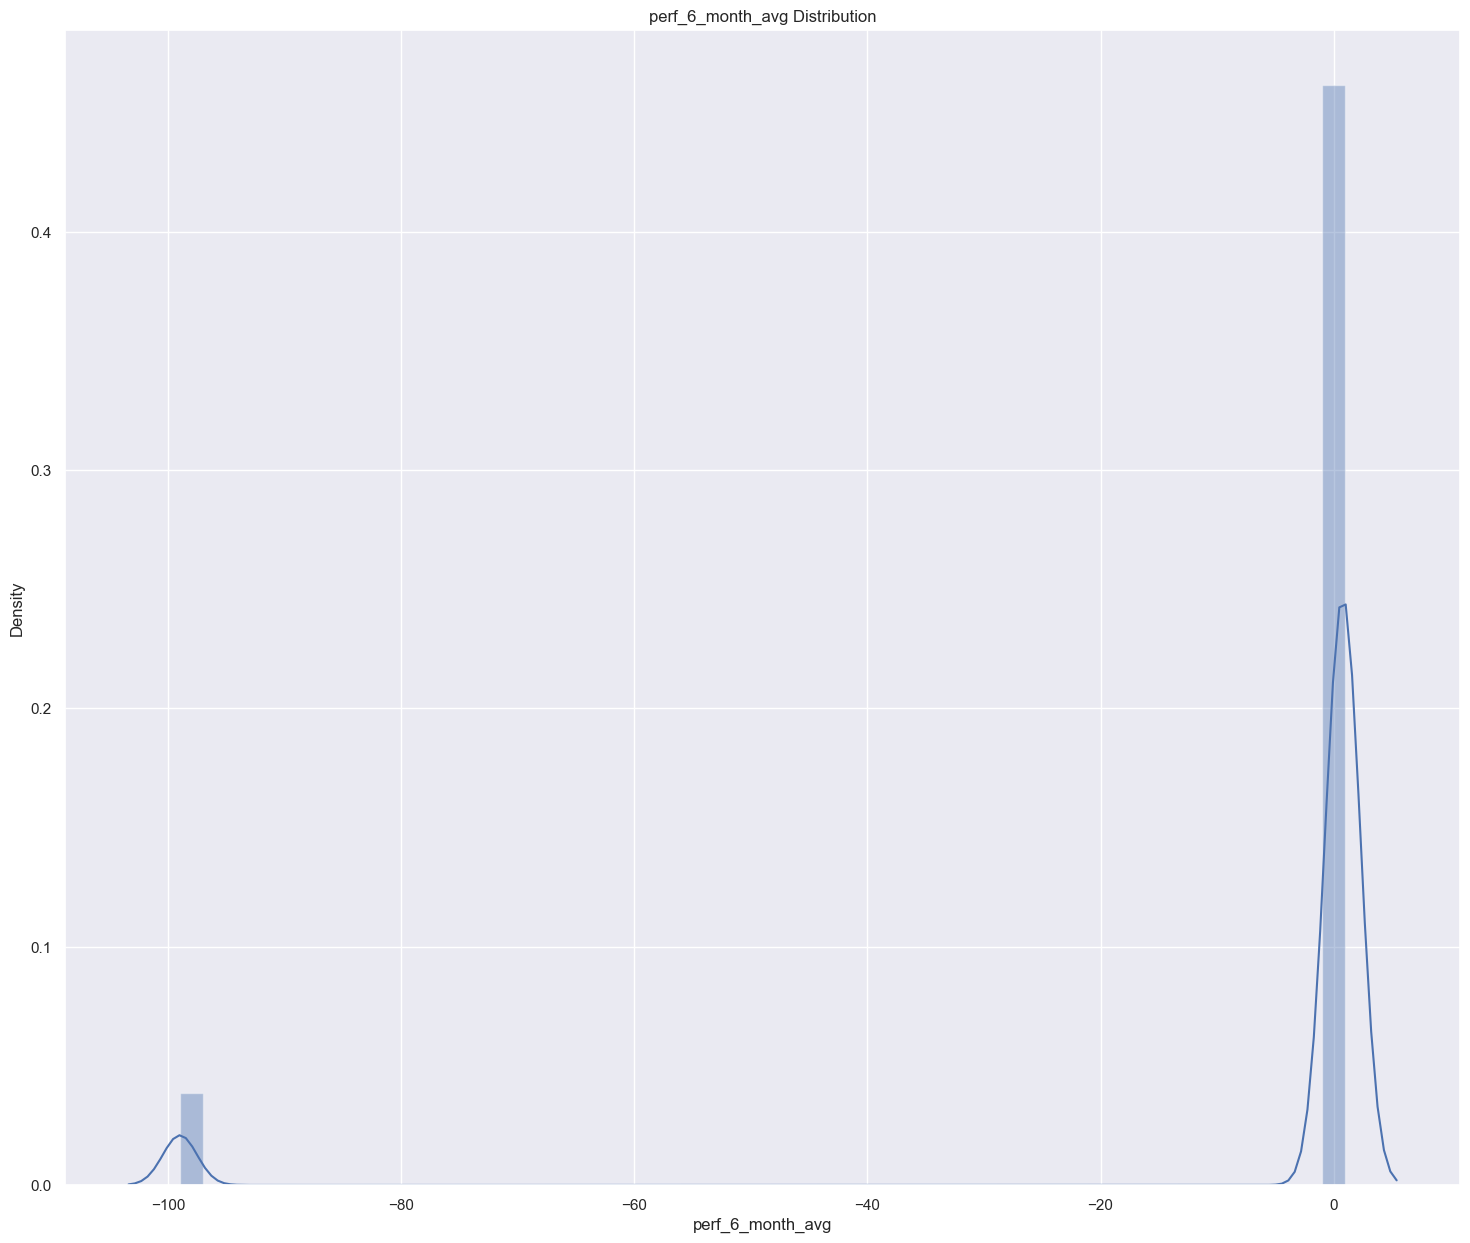

In [223]:
# Plotting distribution of perf_6_month_avg
sns.distplot(df['perf_6_month_avg'])
plt.title('perf_6_month_avg Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\3347972686.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['perf_12_month_avg'])


Text(0.5, 1.0, 'perf_12_month_avg Distribution')

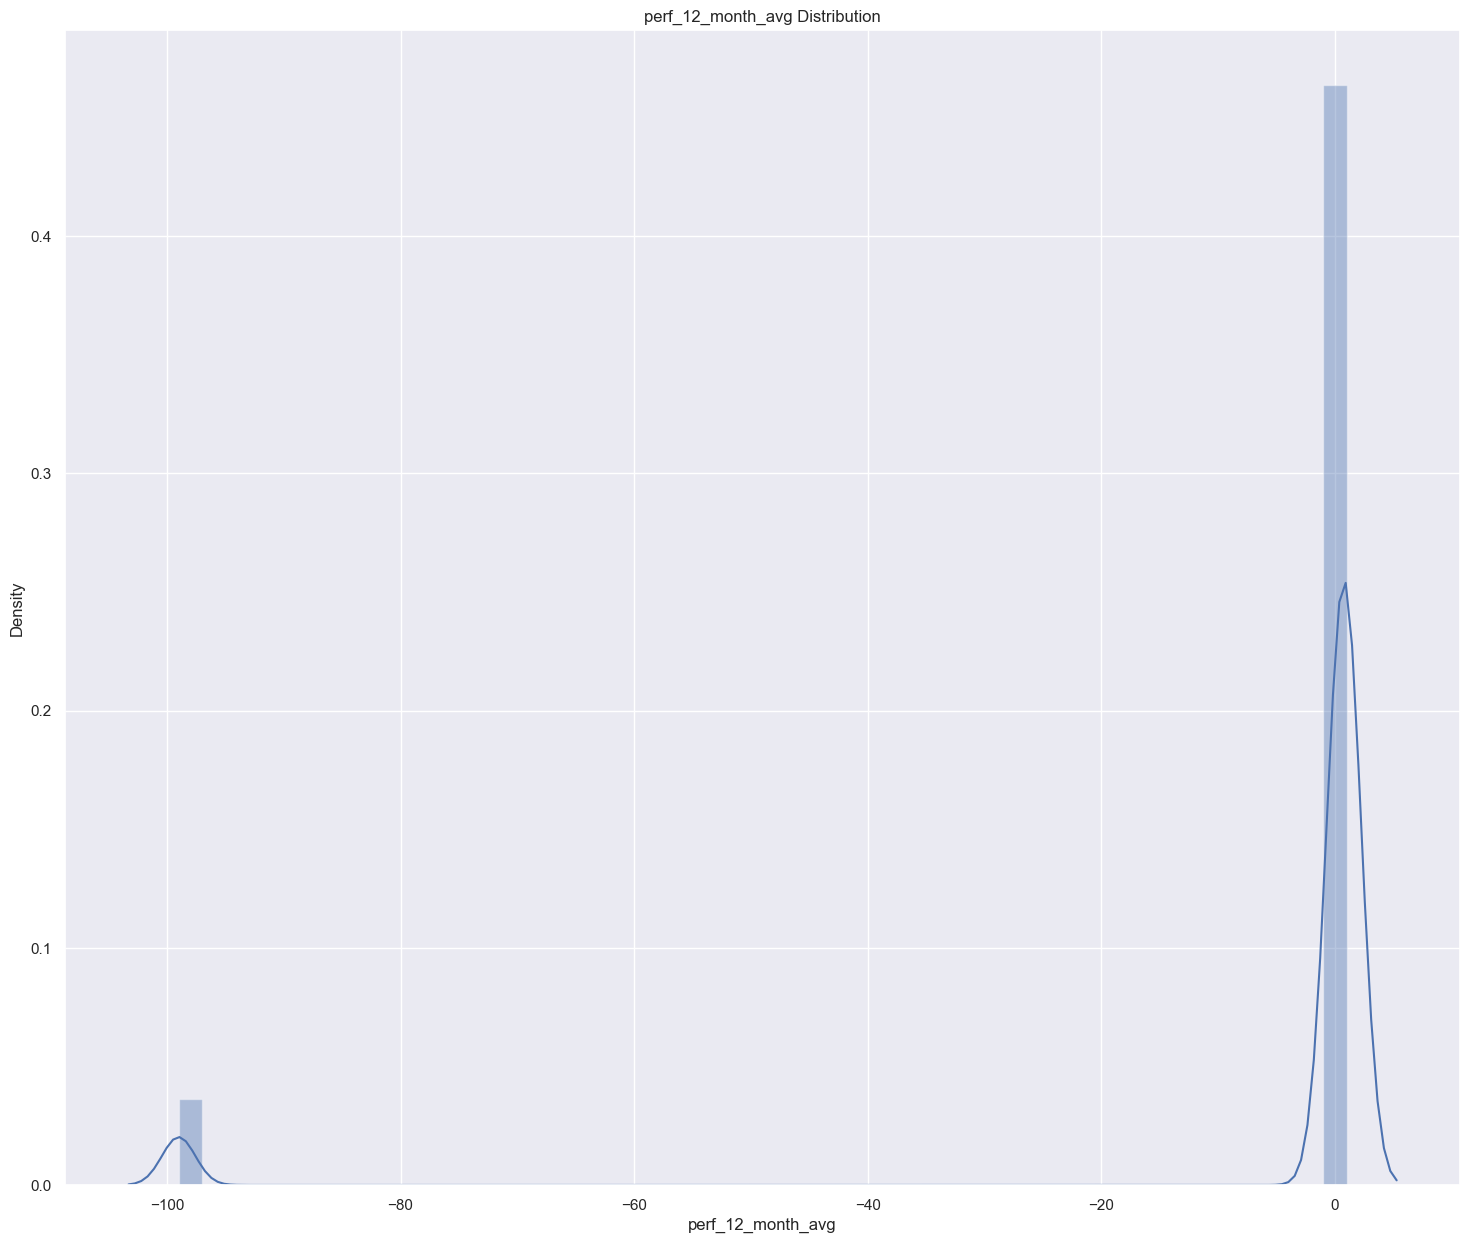

In [224]:
# Plotting distribution of perf_12_month_avg
sns.distplot(df['perf_12_month_avg'])
plt.title('perf_12_month_avg Distribution')

C:\Users\rushe\AppData\Local\Temp\ipykernel_22516\2455299606.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['local_bo_qty'])


Text(0.5, 1.0, 'local_bo_qty Distribution')

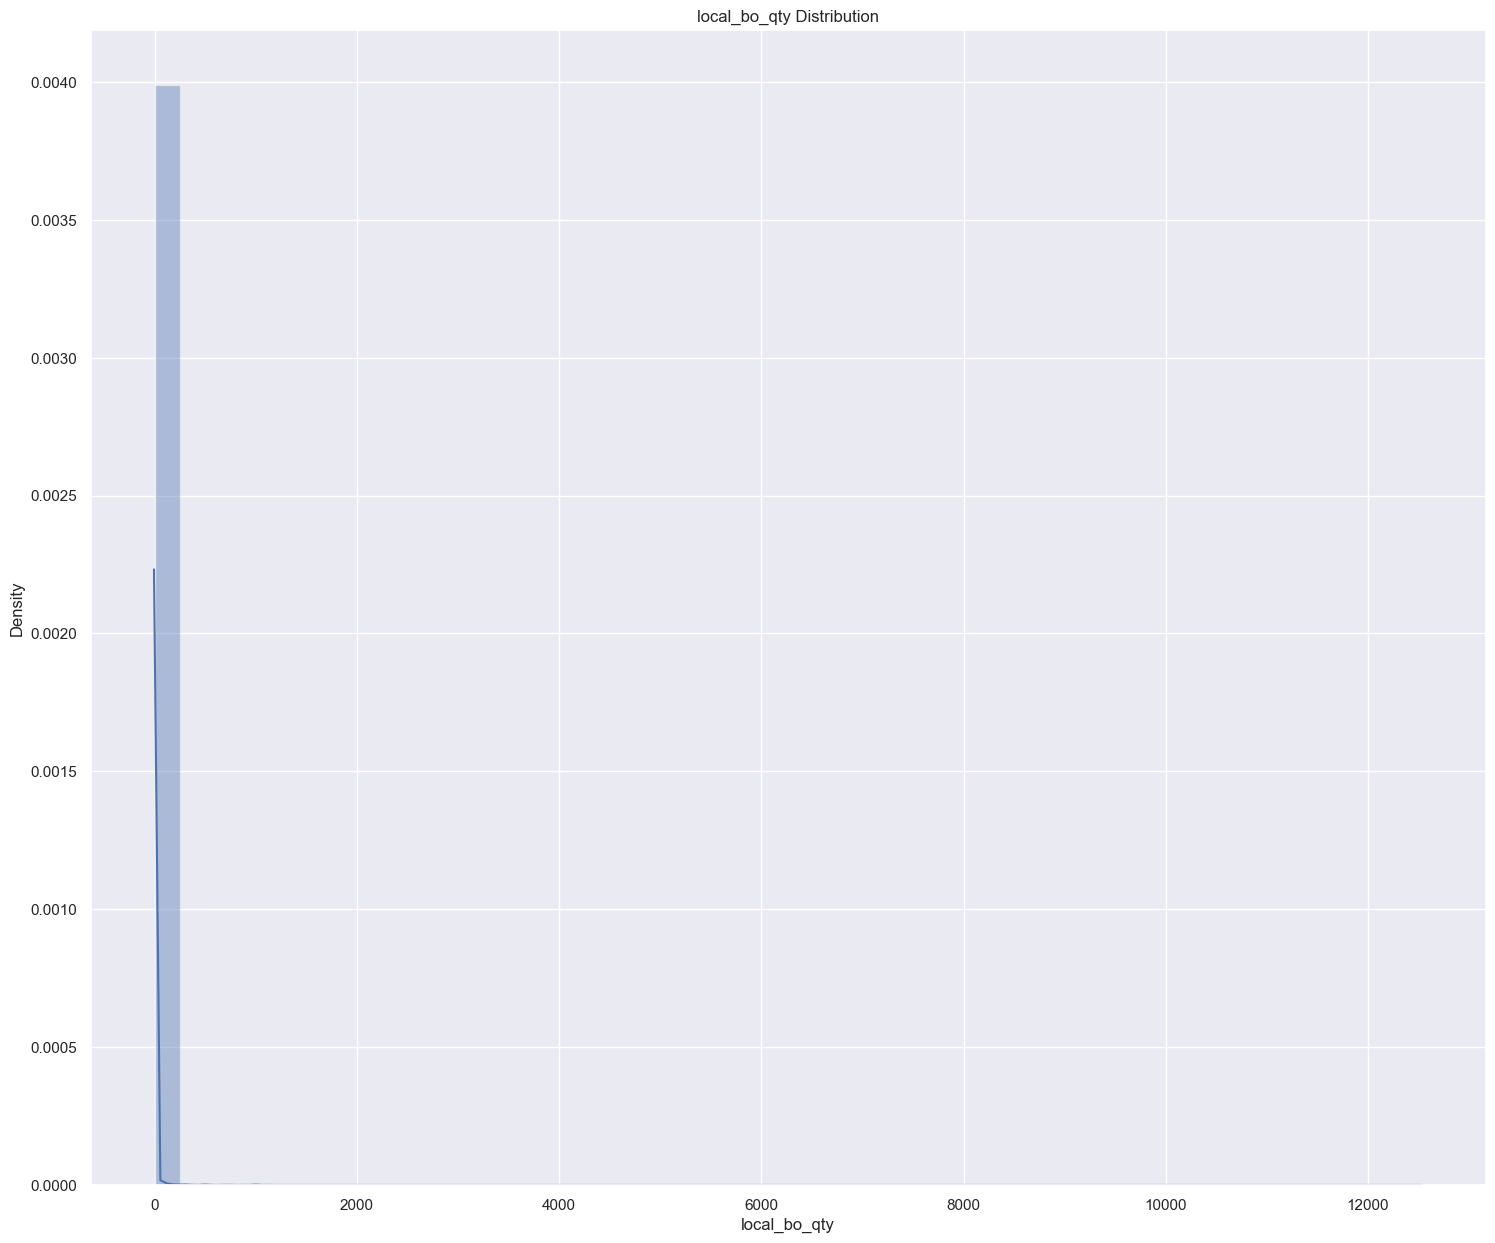

In [225]:
# Plotting distribution of local_bo_qty
sns.distplot(df['local_bo_qty'])
plt.title('local_bo_qty Distribution')

In [46]:
# Replacing -99 values with Nan
df['perf_6_month_avg'] = df['perf_6_month_avg'].replace({-99: np.nan})
df['perf_12_month_avg'] = df['perf_12_month_avg'].replace({-99: np.nan})

In [47]:
df.isna().mean()

national_inv         0.000000
lead_time            0.059907
in_transit_qty       0.000000
forecast_3_month     0.000000
forecast_6_month     0.000000
forecast_9_month     0.000000
sales_1_month        0.000000
sales_3_month        0.000000
sales_6_month        0.000000
sales_9_month        0.000000
min_bank             0.000000
potential_issue      0.000000
pieces_past_due      0.000000
perf_6_month_avg     0.076987
perf_12_month_avg    0.072554
local_bo_qty         0.000000
deck_risk            0.000000
oe_constraint        0.000000
ppap_risk            0.000000
stop_auto_buy        0.000000
rev_stop             0.000000
went_on_backorder    0.000000
dtype: float64

In [48]:
# Binary encoding categorical variables
categorical_features = df.select_dtypes(include = ['object']).columns
for feature in categorical_features:
    df[feature] = df[feature].replace({'Yes': 1, 'No': 0})

In [49]:
# Identifying features which have a high percentage of 0
percent_zero = (df == 0).mean()*100
zero_features = []
for col in percent_zero.index:
    if percent_zero[col] > 95:
        zero_features.append(col)

In [50]:
zero_features

['potential_issue',
 'pieces_past_due',
 'local_bo_qty',
 'oe_constraint',
 'rev_stop',
 'went_on_backorder']

In [51]:
# The above features do not add much value while modelling, so omitting them
df = df.drop(['pieces_past_due', 'local_bo_qty'], axis = 1)
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.99,0.99,0,0,0,1,0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.10,0.13,0,0,0,1,0,0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,NaN,NaN,1,0,0,1,0,0


In [52]:
df = df[df >= 0]

In [53]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.99,0.99,0,0,0,1,0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.10,0.13,0,0,0,1,0,0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,NaN,NaN,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929930,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.48,0.48,1,0,0,1,0,0
1929931,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.48,0.48,1,0,0,1,0,0
1929932,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.48,0.48,1,0,0,1,0,0
1929933,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.48,0.48,1,0,0,1,0,0


In [54]:
# Missing values
print('Percentage of missing values:\n', df[['lead_time', 'perf_6_month_avg', 'perf_12_month_avg']].isna().mean())

Percentage of missing values:
 lead_time            0.059907
perf_6_month_avg     0.076987
perf_12_month_avg    0.072554
dtype: float64


In [55]:
def percentile(num_feature):
    for i in range(0,101,10):
        print(i, 'th percentile value:', df[num_feature].quantile(i*0.01))
    print('\n')
    for i in range(90,101,1):
        print(i, 'th percentile value:', df[num_feature].quantile(i*0.01))
    print('\n')
    for i in np.arange(99,101,0.1):
        print(i, 'th percentile value:', df[num_feature].quantile(i*0.01))

In [56]:
list_1 = [x for x in numerical_features if x not in zero_features]
list_1

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'perf_6_month_avg',
 'perf_12_month_avg']

In [57]:
percentile('national_inv')

0 th percentile value: 0.0
10 th percentile value: 2.0
20 th percentile value: 3.0
30 th percentile value: 6.0
40 th percentile value: 10.0
50 th percentile value: 15.0
60 th percentile value: 27.0
70 th percentile value: 56.0
80 th percentile value: 120.0
90 th percentile value: 361.0
100 th percentile value: 12334404.0


90 th percentile value: 361.0
91 th percentile value: 419.0
92 th percentile value: 492.0
93 th percentile value: 580.0
94 th percentile value: 725.0
95 th percentile value: 927.0
96 th percentile value: 1230.0
97 th percentile value: 1830.0
98 th percentile value: 3027.0
99 th percentile value: 5501.0
100 th percentile value: 12334404.0


99.0 th percentile value: 5501.0
99.1 th percentile value: 6121.0
99.19999999999999 th percentile value: 6940.0
99.29999999999998 th percentile value: 8004.0
99.39999999999998 th percentile value: 9400.959999998799
99.49999999999997 th percentile value: 11111.999999996973
99.59999999999997 th percentile value: 13705.0
99.6999999999

ValueError: percentiles should all be in the interval [0, 1]. Try 0.010009999999999995 instead.

In [ ]:
percentile('lead_time')

In [ ]:
percentile('in_transit_qty')

In [ ]:
percentile('forecast_3_month')

In [ ]:
percentile('forecast_6_month')

In [ ]:
percentile('forecast_9_month')

In [58]:
percentile('sales_1_month')

0 th percentile value: 0.0
10 th percentile value: 0.0
20 th percentile value: 0.0
30 th percentile value: 0.0
40 th percentile value: 0.0
50 th percentile value: 0.0
60 th percentile value: 1.0
70 th percentile value: 2.0
80 th percentile value: 8.0
90 th percentile value: 34.0
100 th percentile value: 741774.0


90 th percentile value: 34.0
91 th percentile value: 41.0
92 th percentile value: 50.0
93 th percentile value: 63.0
94 th percentile value: 81.0
95 th percentile value: 106.0
96 th percentile value: 146.0
97 th percentile value: 211.0
98 th percentile value: 336.0
99 th percentile value: 693.0
100 th percentile value: 741774.0


99.0 th percentile value: 693.0
99.1 th percentile value: 765.0
99.19999999999999 th percentile value: 851.0
99.29999999999998 th percentile value: 965.0
99.39999999999998 th percentile value: 1101.0
99.49999999999997 th percentile value: 1297.0
99.59999999999997 th percentile value: 1620.0
99.69999999999996 th percentile value: 2174.0
99.799999999999

ValueError: percentiles should all be in the interval [0, 1]. Try 0.010009999999999995 instead.

In [ ]:
percentile('sales_3_month')

In [ ]:
percentile('sales_6_month')

In [ ]:
percentile('sales_9_month')

In [ ]:
percentile('min_bank')

In [59]:
percentile('perf_6_month_avg')

0 th percentile value: 0.0
10 th percentile value: 0.47
20 th percentile value: 0.66
30 th percentile value: 0.73
40 th percentile value: 0.78
50 th percentile value: 0.85
60 th percentile value: 0.91
70 th percentile value: 0.95
80 th percentile value: 0.98
90 th percentile value: 0.99
100 th percentile value: 1.0


90 th percentile value: 0.99
91 th percentile value: 0.99
92 th percentile value: 1.0
93 th percentile value: 1.0
94 th percentile value: 1.0
95 th percentile value: 1.0
96 th percentile value: 1.0
97 th percentile value: 1.0
98 th percentile value: 1.0
99 th percentile value: 1.0
100 th percentile value: 1.0


99.0 th percentile value: 1.0
99.1 th percentile value: 1.0
99.19999999999999 th percentile value: 1.0
99.29999999999998 th percentile value: 1.0
99.39999999999998 th percentile value: 1.0
99.49999999999997 th percentile value: 1.0
99.59999999999997 th percentile value: 1.0
99.69999999999996 th percentile value: 1.0
99.79999999999995 th percentile value: 1.0
99.8999

ValueError: percentiles should all be in the interval [0, 1]. Try 0.010009999999999995 instead.

In [ ]:
percentile('perf_12_month_avg')

In [60]:
(df['sales_3_month'] > 18027.85799998627).sum()

1930

In [61]:
# Imputing missing values with mean
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].mean())
df['perf_6_month_avg'] = df['perf_6_month_avg'].fillna(df['perf_6_month_avg'].mean())
df['perf_12_month_avg'] = df['perf_12_month_avg'].fillna(df['perf_12_month_avg'].mean())
df['national_inv'] = df['national_inv'].fillna(df['national_inv'].mean())

In [62]:
#Number of missing values after imputing 
df.isna().sum().sum()

0

In [63]:
from scipy.spatial.distance import mahalanobis

In [64]:
df_yes = df[df['went_on_backorder'] == 1]
df_no = df[df['went_on_backorder'] == 0]

In [65]:
def calculate_mahalanobis_distances(data):
    mean = data.mean(axis=0)
    covariance = data.cov()
    covariance_inv = np.linalg.inv(covariance)
    diff = data - mean
    md = []
    for i in range(len(data)):
        x_diff = diff.iloc[i]
        md.append(np.sqrt(np.dot(np.dot(x_diff, covariance_inv), x_diff.T)))
    return np.array(md)

In [66]:
numerical_columns.remove('pieces_past_due')
numerical_columns.remove('local_bo_qty')
numerical_columns

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'perf_6_month_avg',
 'perf_12_month_avg']

In [67]:
md_yes = calculate_mahalanobis_distances(df_yes[numerical_columns])
md_no = calculate_mahalanobis_distances(df_no[numerical_columns])

In [73]:
from scipy.stats import chi2
chi_sq_val = chi2.ppf(0.99, 15)

In [74]:
chi_sq_val

30.57791416689249

In [75]:
# Remove outliers from the dataset
df_yes_wo_outliers = df_yes[md_yes <= chi_sq_val]
df_no_wo_outliers = df_no[md_no <= chi_sq_val]

In [76]:
df = pd.concat([df_yes_wo_outliers, df_no_wo_outliers])

In [123]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
143,0.0000,8.0,0.0,2.0,3.0,5.0,0.0,3.0,3.0,3.0,2.0,0,0.680,0.580000,0,0,1,1,0,1
173,24.0000,8.0,0.0,3456.0,3456.0,3456.0,10.0,39.0,68.0,93.0,7.0,0,1.000,0.950000,0,0,1,1,0,1
176,498.6838,8.0,2.0,428.0,526.0,606.0,25.0,100.0,205.0,387.0,52.0,0,0.782,0.776896,0,0,0,1,0,1
180,30.0000,8.0,14.0,42.0,84.0,126.0,7.0,56.0,107.0,148.0,24.0,0,0.980,0.920000,0,0,0,1,0,1
191,498.6838,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,401.0,0,0.490,0.720000,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929930,12.0000,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.480,0.480000,1,0,0,1,0,0
1929931,13.0000,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.480,0.480000,1,0,0,1,0,0
1929932,13.0000,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.480,0.480000,1,0,0,1,0,0
1929933,10.0000,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.480,0.480000,1,0,0,1,0,0


In [124]:
# Splitting the dataframe into train and test sets
X = df.drop('went_on_backorder', axis = 1)
y = df['went_on_backorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [125]:
right_skewed_features = ['national_inv' , 'in_transit_qty' , 'forecast_3_month', 'forecast_6_month', 'forecast_9_month' , 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month' , 'min_bank']
right_skewed_column_ids = []
for i in right_skewed_features:
    right_skewed_column_ids.append(df.columns.get_loc(i))
right_skewed_column_ids

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [126]:
def log_transform(x):
    sign = np.sign(x[right_skewed_column_ids])
    x[right_skewed_column_ids] =  np.log(1.0+abs(x[right_skewed_column_ids]))*sign
    return x

X_train_log = np.apply_along_axis(log_transform, 1, X_train)
X_test_log = np.apply_along_axis(log_transform, 1, X_test)

In [127]:
# Checking for class imbalance
class_ratio = Counter(y_train)
class_ratio

Counter({0: 1340514, 1: 9723})

In [128]:
# Performing over-sampling to deal class imbalance
smt = SMOTE(sampling_strategy = 0.3)
X_train_1, y_train_1 = smt.fit_resample(X_train_log, y_train)

class_ratio = Counter(y_train_1)
class_ratio

Counter({0: 1340514, 1: 402154})

In [129]:
# Combine X_train and y_train into a single DataFrame
train = pd.concat([pd.DataFrame(X_train_1), pd.DataFrame(y_train_1)], axis=1)

# Split the training data into two DataFrames, one for each class
class_0 = train[train['went_on_backorder'] == 0]
class_1 = train[train['went_on_backorder'] == 1]

# Get 100,000 data points for each class
class_0_samples = class_0.sample(n=100000, random_state=42)
class_1_samples = class_1.sample(n=100000, random_state=42)

# Combine the two samples into a single DataFrame
sampled_data = pd.concat([class_0_samples, class_1_samples])

# Shuffle the sampled data
sampled_data = sampled_data.sample(frac=1, random_state=42)

# Separate the features and labels
X_train_2 = sampled_data.drop('went_on_backorder', axis=1)
y_train_2 = sampled_data['went_on_backorder']

class_ratio = Counter(y_train_2)
class_ratio

Counter({1: 100000, 0: 100000})

In [130]:
# Combine X_test and y_test into a single DataFrame
test = pd.concat([pd.DataFrame(X_test_log), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

# Split the testing data into two DataFrames, one for each class
class_0 = test[test['went_on_backorder'] == 0]
class_1 = test[test['went_on_backorder'] == 1]

# Get data points for each class
class_0_samples = class_0.sample(n=55770, random_state=42)
class_1_samples = class_1.sample(n=4230, random_state=42)

# Combine the two samples into a single DataFrame
sampled_data = pd.concat([class_0_samples, class_1_samples])

# Shuffle the sampled data
sampled_data = sampled_data.sample(frac=1, random_state=42)

# Separate the features and labels
X_test_1 = sampled_data.drop('went_on_backorder', axis=1)
y_test_1 = sampled_data['went_on_backorder']

class_ratio = Counter(y_test_1)
class_ratio

Counter({0: 55770, 1: 4230})

In [131]:
# Scaling the data
sc = StandardScaler()
X_train_final = pd.DataFrame(sc.fit_transform(X_train_2))
X_test_final = pd.DataFrame(sc.transform(X_test_1))

In [132]:
y_train_final = y_train_2
y_test_final = y_test_1

In [133]:
# Function to print performance metrics
def performance_metrics(X_train, X_test, y_train, y_test, y_pred, model):
    conf_matrix = confusion_matrix(y_test, y_pred)
  
    plt.figure(figsize = (3,3))
    sns.heatmap(conf_matrix, annot = True, fmt='g', vmin=0, cmap = 'Blues', cbar = False)
    plt.xticks(ticks=[0.5, 1.5])
    plt.yticks(ticks=[0.5, 1.5])
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()

    print('Train Accuracy: %.3f' % model.score(X_train, y_train))
    print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred)) 
    print('Precision: %.3f' % precision_score(y_test, y_pred, average='macro'))
    print('Recall: %.3f' % recall_score(y_test, y_pred, average='macro'))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred, average='macro'))
    print('ROC-AUC Score: %.3f' % roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    '''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random guessing curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    '''

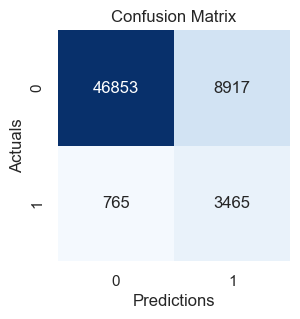

Train Accuracy: 0.831
Test Accuracy: 0.839
Precision: 0.632
Recall: 0.830
F1 Score: 0.662
ROC-AUC Score: 0.896


In [179]:
# Logistic Regression
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train_final, y_train_final)
y_pred = log_reg.predict(X_test_final)
y_pred_prob = log_reg.predict_proba(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred, log_reg)

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test_final, y_pred_prob[:,1])
log_reg_roc_auc = auc(log_reg_fpr, log_reg_tpr)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
LogisticRegression(C=0.1, max_iter=2000, solver='newton-cg')


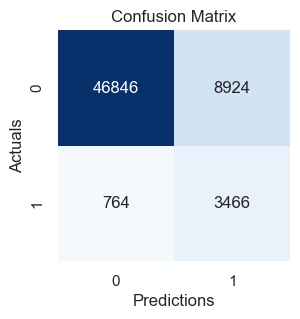

Train Accuracy: 0.830
Test Accuracy: 0.839
Precision: 0.632
Recall: 0.830
F1 Score: 0.662
ROC-AUC Score: 0.896


In [135]:
# Logistic Regression Hyper-parameter Tuning
log_reg = LogisticRegression()

param_grid = [{'penalty': ['l2'],
               'C': [100, 10, 1.0, 0.1, 0.01],
               'solver': ['newton-cg', 'lbfgs', 'liblinear'],
               'max_iter': [2000]}]

clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, scoring = 'f1', verbose = 2, n_jobs = -1)

best_clf = clf.fit(X_train_final, y_train_final)                         
print(best_clf.best_estimator_)
y_pred = best_clf.predict(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred, best_clf)

C:\Users\manee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


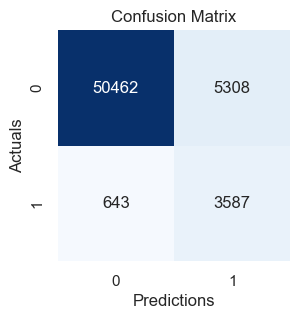

KeyboardInterrupt: 

In [136]:
# K Nearest Neighbors
knn = KNeighborsClassifier() 
knn.fit(X_train_final, y_train_final) 
y_pred = knn.predict(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred, knn)

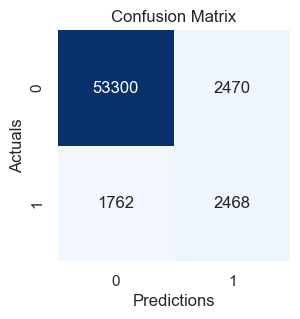

Train Accuracy: 0.997
Test Accuracy: 0.929
Precision: 0.734
Recall: 0.770
F1 Score: 0.750
ROC-AUC Score: 0.771


In [180]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state = 42)
dtree.fit(X_train_final, y_train_final) 
y_pred = dtree.predict(X_test_final)
y_pred_prob = dtree.predict_proba(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred, dtree)

dtree_fpr, dtree_tpr, _ = roc_curve(y_test_final, y_pred_prob[:,1])
dtree_roc_auc = auc(dtree_fpr, dtree_tpr)

Fitting 3 folds for each of 361 candidates, totalling 1083 fits
DecisionTreeClassifier(max_depth=19, random_state=42)


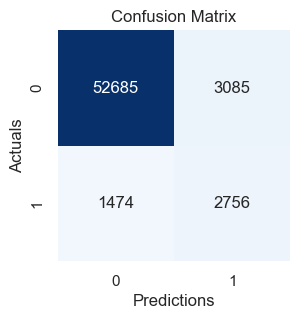

Train Accuracy: 0.983
Test Accuracy: 0.924
Precision: 0.722
Recall: 0.798
F1 Score: 0.753
ROC-AUC Score: 0.808


In [143]:
# Decision Tree Hyper-parameter Tuning
dtree = DecisionTreeClassifier(random_state = 42)

param_grid = [{'max_depth': list(range(1,20)),
               'min_samples_leaf': list(range(1,20))}]

dtree_clf = GridSearchCV(dtree, param_grid = param_grid, cv = 3, scoring = 'f1', verbose = True, n_jobs = -1)

best_clf = dtree_clf.fit(X_train_final, y_train_final)                         
print(best_clf.best_estimator_)
y_pred_dtree = best_clf.predict(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred_dtree, best_clf)

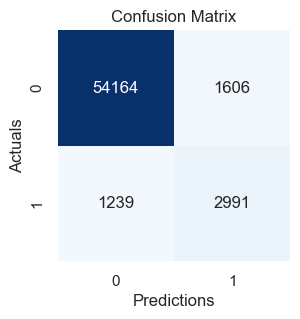

Train Accuracy: 0.997
Test Accuracy: 0.953
Precision: 0.814
Recall: 0.839
F1 Score: 0.826
ROC-AUC Score: 0.957


In [181]:
# Random Forest
rfm = RandomForestClassifier(random_state = 42)
rfm.fit(X_train_final, y_train_final) 
y_pred = rfm.predict(X_test_final)
y_pred_prob = rfm.predict_proba(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred, rfm)

rfm_fpr, rfm_tpr, _ = roc_curve(y_test_final, y_pred_prob[:,1])
rfm_roc_auc = auc(rfm_fpr, rfm_tpr)

Fitting 3 folds for each of 57 candidates, totalling 171 fits
RandomForestClassifier(max_depth=19, n_estimators=150, random_state=42)


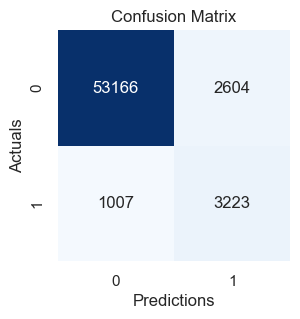

Train Accuracy: 0.983
Test Accuracy: 0.940
Precision: 0.767
Recall: 0.858
F1 Score: 0.804
ROC-AUC Score: 0.957


In [147]:
# Random Forest Hyper-parameter Tuning
rfm = RandomForestClassifier(random_state=42)

param_grid = [{'max_depth': list(range(1,20)),
               'n_estimators': [50, 100, 150]}]

rfm_clf = GridSearchCV(rfm, param_grid = param_grid, cv = 3, scoring = 'f1', verbose = True, n_jobs = -1)

best_clf = rfm_clf.fit(X_train_final, y_train_final)                         
print(best_clf.best_estimator_)
y_pred_rfm = best_clf.predict(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred_rfm, best_clf)

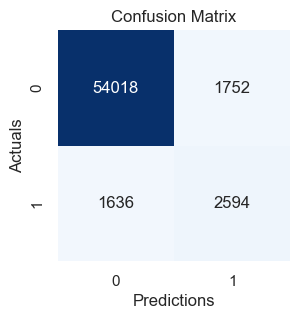

Train Accuracy: 0.973
Test Accuracy: 0.944
Precision: 0.784
Recall: 0.791
F1 Score: 0.787
ROC-AUC Score: 0.943


In [182]:
# XGBoost
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train_final, y_train_final) 
y_pred = xgb.predict(X_test_final)
y_pred_prob = xgb.predict_proba(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred, xgb)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test_final, y_pred_prob[:,1])
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

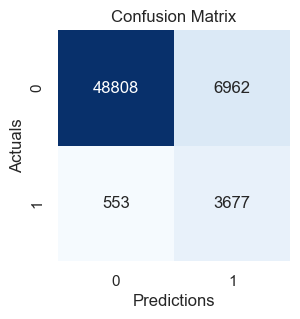

Train Accuracy: 0.882
Test Accuracy: 0.875
Precision: 0.667
Recall: 0.872
F1 Score: 0.712
ROC-AUC Score: 0.939


In [142]:
# ANN
ann = MLPClassifier(hidden_layer_sizes=(9, 9), max_iter=500, activation='relu', solver='adam', random_state=42)
ann.fit(X_train_final, y_train_final)
y_pred = ann.predict(X_test_final)
performance_metrics(X_train_final, X_test_final, y_train_final, y_test_final, y_pred, ann)

In [201]:
pred=[]
for model in [log_reg, dtree, rfm, xgb]:
    pred.append(pd.Series(y_pred_prob[:,1]))
pred_ens = pd.concat(pred, axis = 1).mean(axis = 1)
print('Ensemble Test ROC-AUC score: {}'.format(roc_auc_score(y_test_final, pred_ens)))

Ensemble Test ROC-AUC score: 0.9427061902757483


In [202]:
pred_ens

0        0.025127
1        0.005508
2        0.037357
3        0.049484
4        0.120003
           ...   
59995    0.003898
59996    0.002222
59997    0.006727
59998    0.015811
59999    0.783211
Length: 60000, dtype: float32

In [203]:
fpr, tpr, thresholds = roc_curve(y_test_final, pred_ens)
thresholds

array([1.9940385e+00, 9.9403846e-01, 9.9077892e-01, ..., 1.6295757e-05,
       1.6260921e-05, 9.2948612e-06], dtype=float32)

In [204]:
accuracy = []
f1 = []
for i in thresholds:
    y_pred_ens = np.where(pred_ens > i,1,0)
    accuracy.append(accuracy_score(y_test_final, y_pred_ens, normalize=True))
    f1.append(f1_score(y_test_final, y_pred_ens, average='macro'))
    
performance = pd.concat([pd.Series(thresholds), pd.Series(accuracy), pd.Series(f1)], axis=1)
performance.columns = ['Thresholds', 'Accuracy', 'F-1 Score']
performance.sort_values(by='F-1 Score', ascending=False, inplace=True)

In [205]:
performance.head()

,Thresholds,Accuracy,F-1 Score
2081,0.466670,0.941833,0.787743
2084,0.466033,0.941767,0.787720
2082,0.466613,0.941817,0.787704
2079,0.466797,0.941833,0.787699
2083,0.466174,0.941767,0.787676


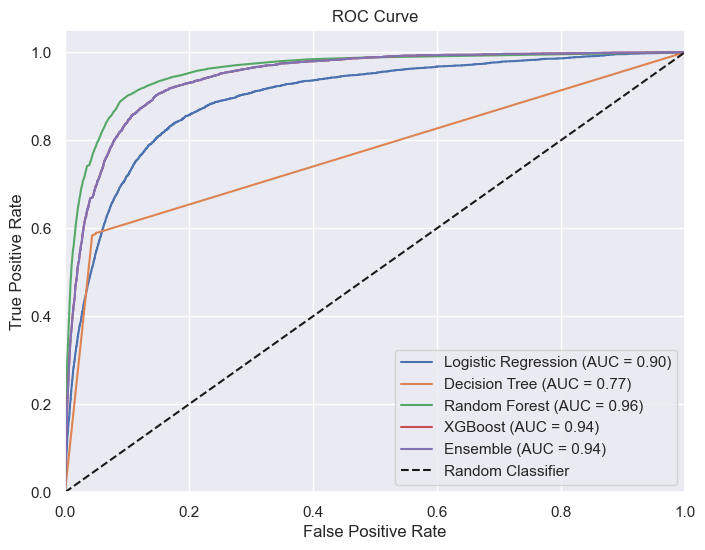

In [206]:
# ROC curve for each model
plt.figure(figsize=(8,6))

plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression (AUC = %0.2f)' % log_reg_roc_auc)
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree (AUC = %0.2f)' % dtree_roc_auc)
plt.plot(rfm_fpr, rfm_tpr, label='Random Forest (AUC = %0.2f)' % rfm_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = %0.2f)' % xgb_roc_auc)
plt.plot(fpr, tpr, label='Ensemble (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [224]:
importances = rfm.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for i in range(df.shape[1]):
    print("%d. %s (%f)" % (i + 1, df.columns[indices[i]], importances[indices[i]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(df.shape[1]), importances[indices])
plt.xticks(range(df.shape[1]), df.columns[indices], rotation=90)
plt.xlim([-1, df.shape[1]])
plt.show()

Feature ranking:
1. national_inv (0.194863)
2. forecast_3_month (0.123013)
3. forecast_6_month (0.110555)
4. forecast_9_month (0.109572)
5. sales_1_month (0.061791)
6. perf_6_month_avg (0.054928)
7. perf_12_month_avg (0.053152)
8. in_transit_qty (0.052963)
9. sales_3_month (0.048352)
10. sales_6_month (0.047767)
11. sales_9_month (0.046447)
12. min_bank (0.035616)
13. lead_time (0.033082)
14. ppap_risk (0.011174)
15. deck_risk (0.010938)
16. stop_auto_buy (0.005380)
17. potential_issue (0.000218)
18. rev_stop (0.000145)
19. oe_constraint (0.000044)


IndexError: index 19 is out of bounds for axis 0 with size 19